# <font color=darkblue><p style="text-align:center;">Capstone Project</p></font>
# <p style="text-align:center;"> Early Prediction of Diabetes</p> 

<img src="https://www.bonitas.co.za/wp-content/uploads/2017/04/Holistic-treatment-and-management-of-diabetes-critical-e1510566865944_960x400_crop_80.jpg" style="float: center; height: 400px; width: 800px">

### Background
**Diabetes** is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.


### Problem Statement:
Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. And Saudi Arabia was ranked as the 7th highest country in the world with diabetes. IHME estimated the costs in 2014 were 17 billion SR, expected to increase to 27 billion SR incase undiagnosed people are documented, and 43 billion SR if pre-diabetics become diabetics. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports.

### Objective
The objective of this project is to build a machine learning Classification model to predict whether or not the patient has diabetes or not based on certain diagnostic measurements.

### Dataset Used: 
* The population for this study was the Pima Indian population near Phoenix, Arizona. 
* The population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) because of its high incidence rate of diabetes.
* This dataset is originally from the NIDDK, and it is credited to UCI Machine Learning Repository.
* All patients in this dataset are Females of at least 21 years of age. 

<img src="https://msr7.net/images/separator-lines-10.png" style="float: center; height: 60px; width: 900px">    

## Step 1: Load the data.

In [3]:
#stop warning messages
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
# Import some necessary librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# load dataset in pandas dataframe
diabetes = pd.read_csv('../part_02/dataset/diabetes.csv')

In [6]:
# display the first two rows of the dataset.
diabetes.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

In [7]:
# print clumns' names
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### 1- Features Description:
* **The datasets consists of several medical predictor variables and one target variable:**
<ol>
  <li>**Outcome:** Class Variable (0 or 1) where '0' denotes patient is not having diabetes and '1' denotes patient having diabetes..</li>
</ol>

 
* **Predictor variables includes:**
<ol>
  <li>**Pregnancies:** Number of times the patient got pregnant.</li>
  <li>**Glucose:** Plasma Glucose Concentration a 2 hour in an oral glucose tolerance test (mg/dl)
* Normal: Below 140 mg/dl
* Prediabetes: 140 to 199 mg/dl
* Diabetes: 200 mg/dl or more
A 2-hour value between 140 and 200 mg/dl is called impaired glucosetolerance. This is called "pre-diabetes", it means you are at increased risk of developing diabetes over time. A glucose level of 200 mg/dl or higher is used to diagnose diabetes.</li>
  <li>**BloodPressure: Diastolic Blood Pressure (mmHg)**
If Diastolic B.P over 90 means High B.P (High Probability of Diabetes), Diastolic B.P below 60 means Low B.P (Less Probability of Diabetes) </li>
  <li>**SkinThickness: Triceps Skin Fold Thickness (mm)-**
A value used to estimate body fat. Normal Triceps Skinfold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.</li>
  <li>**Insulin: 3-Hour Serum Insulin (mlU/L)**
Normal Insulin Level is between 16-166 mlU/L. Values above this range can be alarming.</li>
  <li> **BMI: Body Mass Index (weight in kg/ height in m)**
Body Mass Index of 18.5 to 25 is within the normal range. BMI between 25 and 30 then it falls within the overweight range. A BMI of 30 or over falls within the obese range.</li>
  <li>**DiabetesPedigreeFunction:**
It provides information about history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.</li>
  <li>**Age:** (in years)</li>
</ol>



### 2- Dataset Details

In [8]:
# Read the dataset shape
print('Number of Patients = {} \nFeatures for each patient = {}'.format(diabetes.shape[0],diabetes.shape[1]))

Number of Patients = 768 
Features for each patient = 9


<img src="https://msr7.net/images/separator-lines-10.png" style="float: center; height: 60px; width: 900px">    

## Step 2: Exploratory Data Analysis (EDA)

* EDA Guidelines:
<ol>
    <li>Investigate the data and identify the data types.</li>
    <li>Studying the target variable</li>
    <li>Examine the distributions of the data, numerically and visually.</li>
    <li>Identify missing data and look for patterns of missing data.</li>
    <li>Identify outliers.</li>
    <li>Find Correlation between features</li>
    <li>Get the importance of features</li>
    <li>Standardization</li>
</ol>

### 1- Investigate the data and identify the data types

In [9]:
# Read the target
print('Number of Patients who have diabetes = {} \nNumber of Patients who don\'t have diabetes = {}'.format((diabetes.Outcome == 1).sum(),(diabetes.Outcome == 0).sum()))

Number of Patients who have diabetes = 268 
Number of Patients who don't have diabetes = 500


In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2. Studying the target variable

In [11]:
# change the target column name to more descriptive one
diabetes=diabetes.rename(columns = {'Outcome':'has_diabetes'})

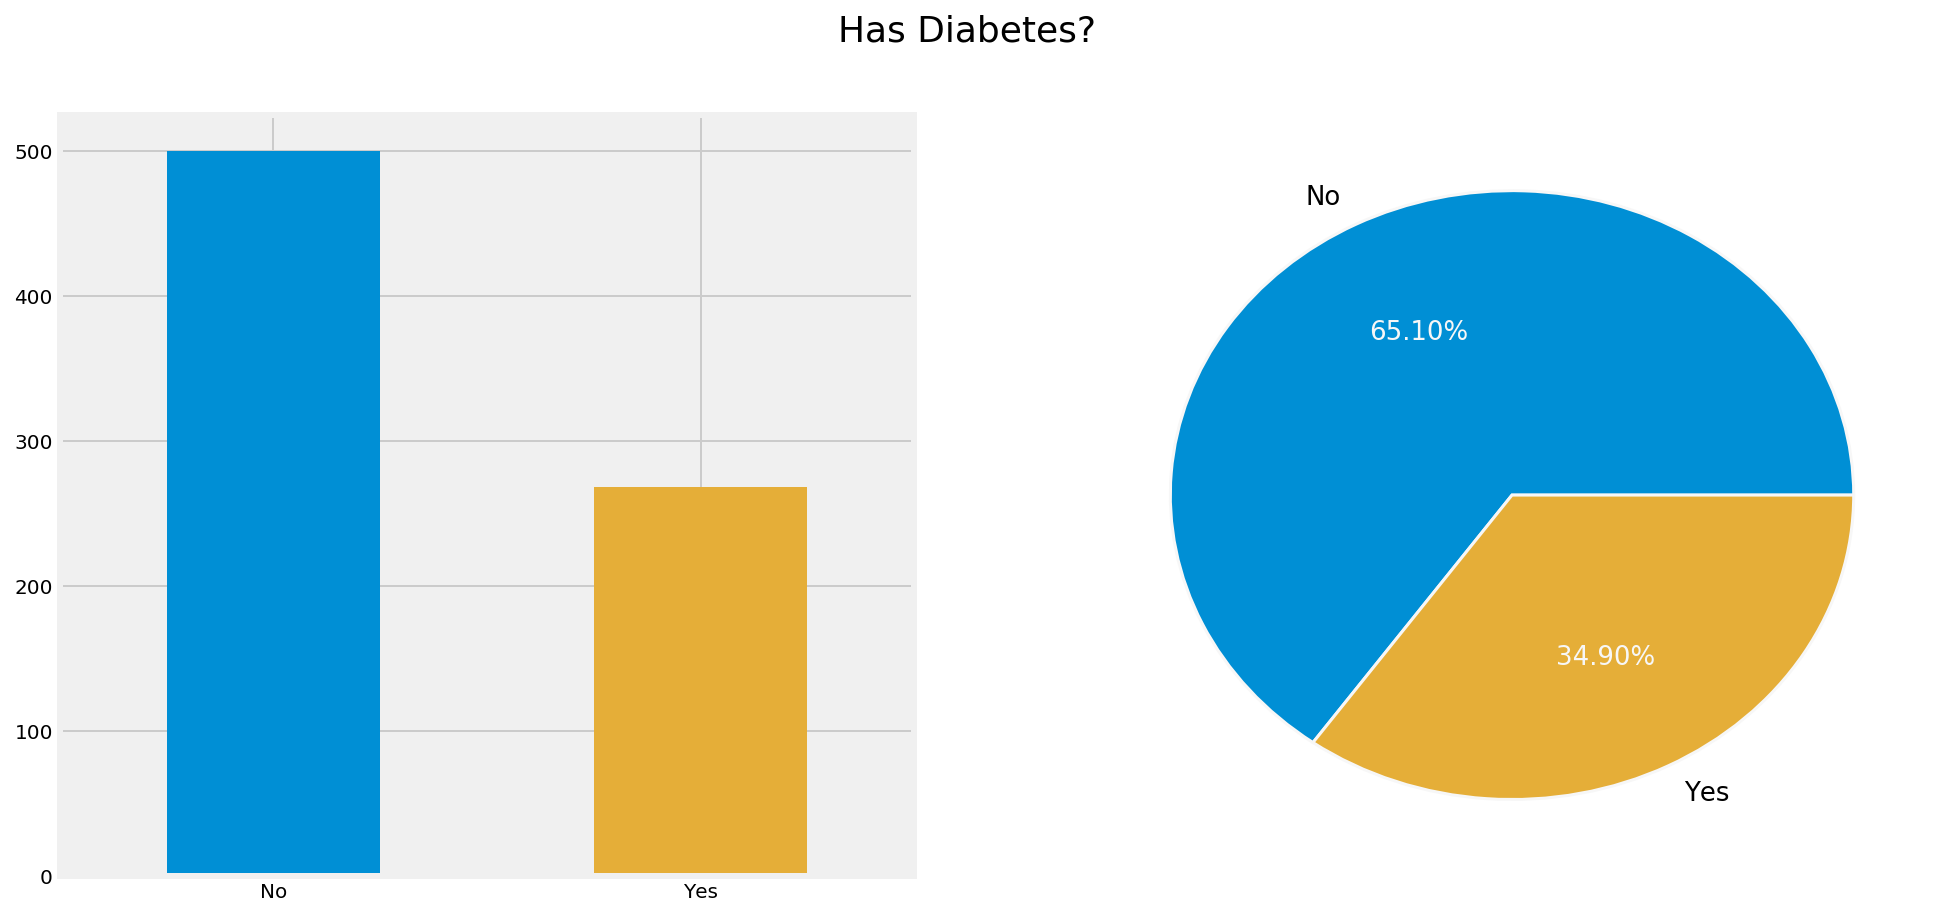

In [12]:
# Visualize the target variable: (has_diabetes)

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
fig.suptitle("Has Diabetes?", fontsize = 18.)
x1 = diabetes.has_diabetes.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
x1 = diabetes.has_diabetes.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

* We have a quite **Imbalanced Dataset** Thus, it is really important to check not only accuracy but also sensitivity (how well it classifies the positive class) and specificity (how well it classifies the negative class).

* In this case, as the negative class is almost double the positive class, we are prone to get high specificity but low sensitivity, and we need to consider that when evaluating the model.

### 3. Examine the distributions of the data, numerically and visually

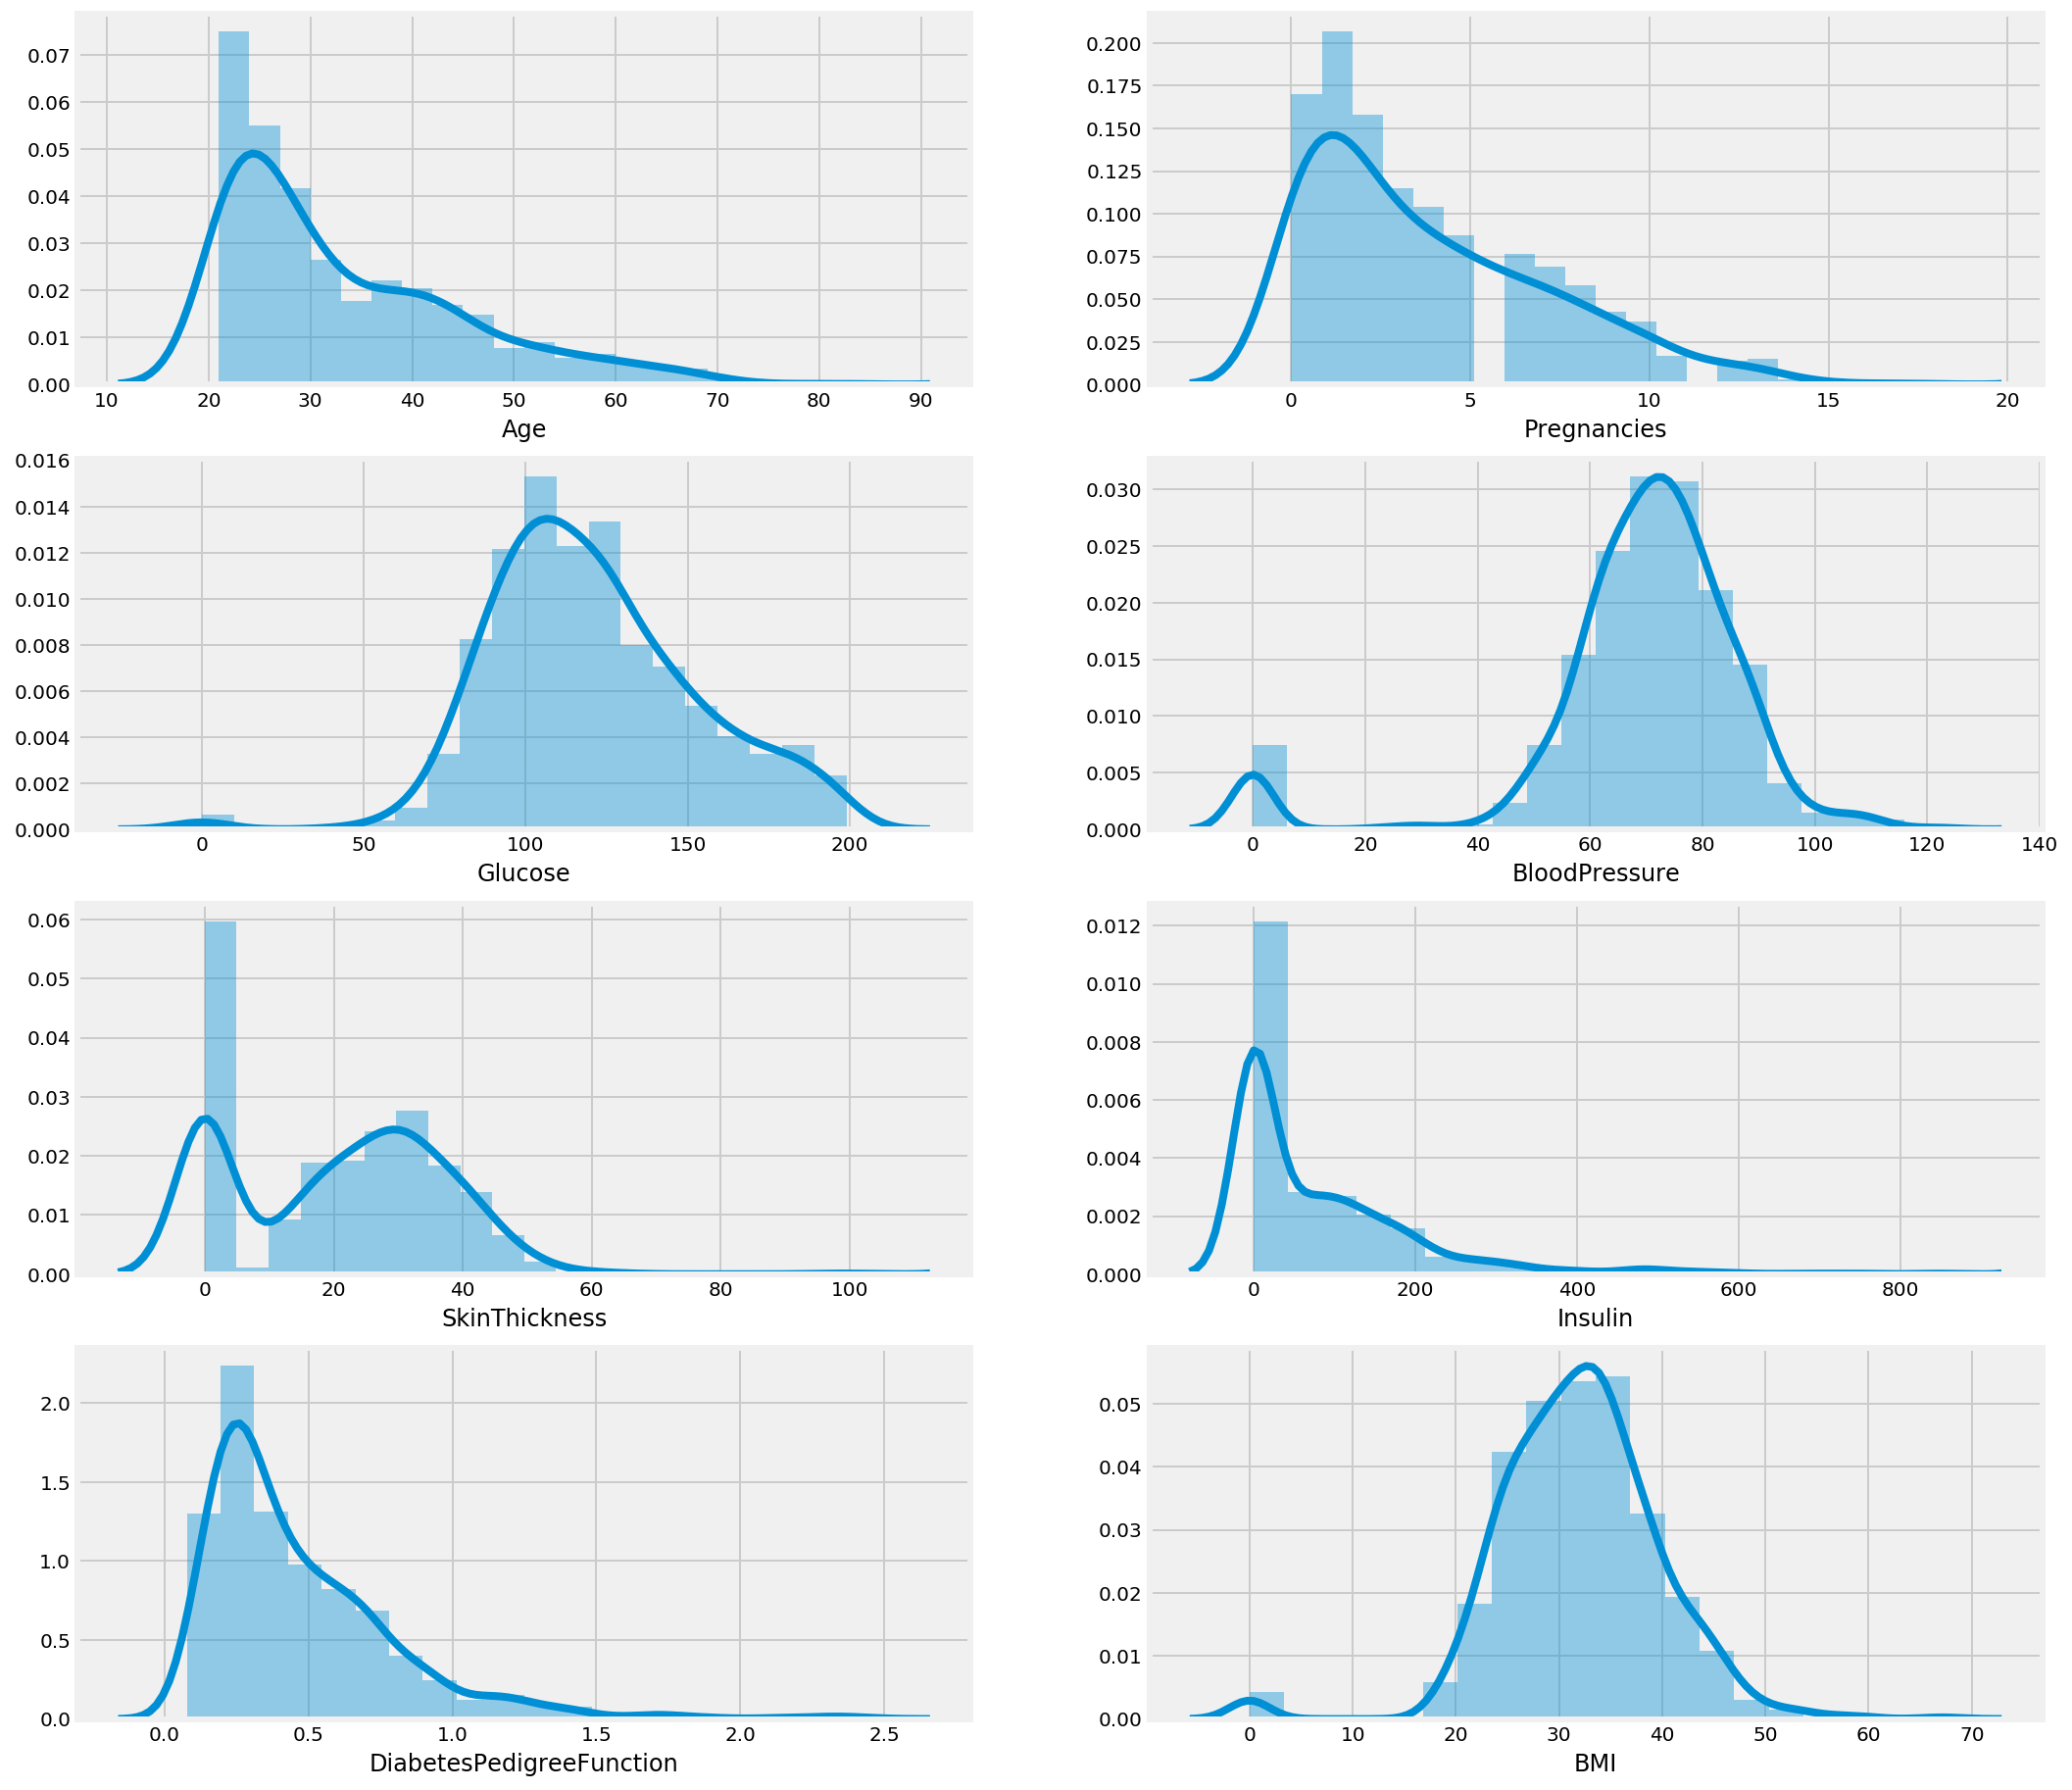

In [13]:
# Dist Plot helps us to flexibly plot a univariate distribution of observations.

fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(diabetes.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(diabetes.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(diabetes.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(diabetes.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(diabetes.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(diabetes.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(diabetes.BMI, bins = 20, ax=ax[3,1]); 

In [14]:
diabetes.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
has_diabetes              768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
has_diabetes                0.0000    1.00000    1.00

**Some takeaways from the data above:**
* Around 35% of the patients have diabetes.
* There average age is around 33.
* The bulk of patients are aged between 24 and 41.
* There is a wide diversity in insulin levels.
* The patients have had just under 4 pregnancies on average.

### 4. Identify missing data and look for patterns of missing data.

* We can notice from the data above that there are some attributes like:(Glucose, Blood Pressure, skin thickness, insulin, BMI) have zeros as (minimum) values, even though those attributes cannot be zeros by logic. So, we can conclude that those zeros are missing values need to deal with them.

In [15]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
has_diabetes                0
dtype: int64

at the first look, the dataset does not have any missing values, but as shown in the previous step there are zeros in the following attributes:
(Glucose, BloodPressure, SkinThickness, Insulin, BMI) and those zeros can be considered as missing values.

In [16]:
# count how many zeros in each column

(diabetes == 0).astype(int).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
has_diabetes                500
dtype: int64

### replace the zeroes in these columns (Glucose, BloodPressure, SkinThickness, Insulin, BMI) with mean


* #### Glucose:

In [17]:
mean_Glucose = diabetes['Glucose'].mean(skipna=True)
diabetes['Glucose']=diabetes.Glucose.mask(diabetes.Glucose == 0,mean_Glucose)

* #### BloodPressure:

In [18]:
mean_BloodPressure = diabetes['BloodPressure'].mean(skipna=True)
diabetes['BloodPressure']=diabetes.BloodPressure.mask(diabetes.BloodPressure == 0,mean_BloodPressure)

* #### SkinThickness:

In [19]:
mean_SkinThickness = diabetes['SkinThickness'].mean(skipna=True)
diabetes['SkinThickness']=diabetes.SkinThickness.mask(diabetes.SkinThickness == 0,mean_SkinThickness)

* #### Insulin:

In [20]:
mean_Insulin = diabetes['Insulin'].mean(skipna=True)
diabetes['Insulin']=diabetes.Insulin.mask(diabetes.Insulin == 0,mean_Insulin)

* #### BMI:

In [21]:
mean_BMI = diabetes['BMI'].mean(skipna=True)
diabetes['BMI']=diabetes.BMI.mask(diabetes.BMI == 0,mean_BMI)

In [22]:
# check if there are any zeros left
(diabetes == 0).astype(int).sum(axis=0)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
has_diabetes                500
dtype: int64

### 5. Identify outliers

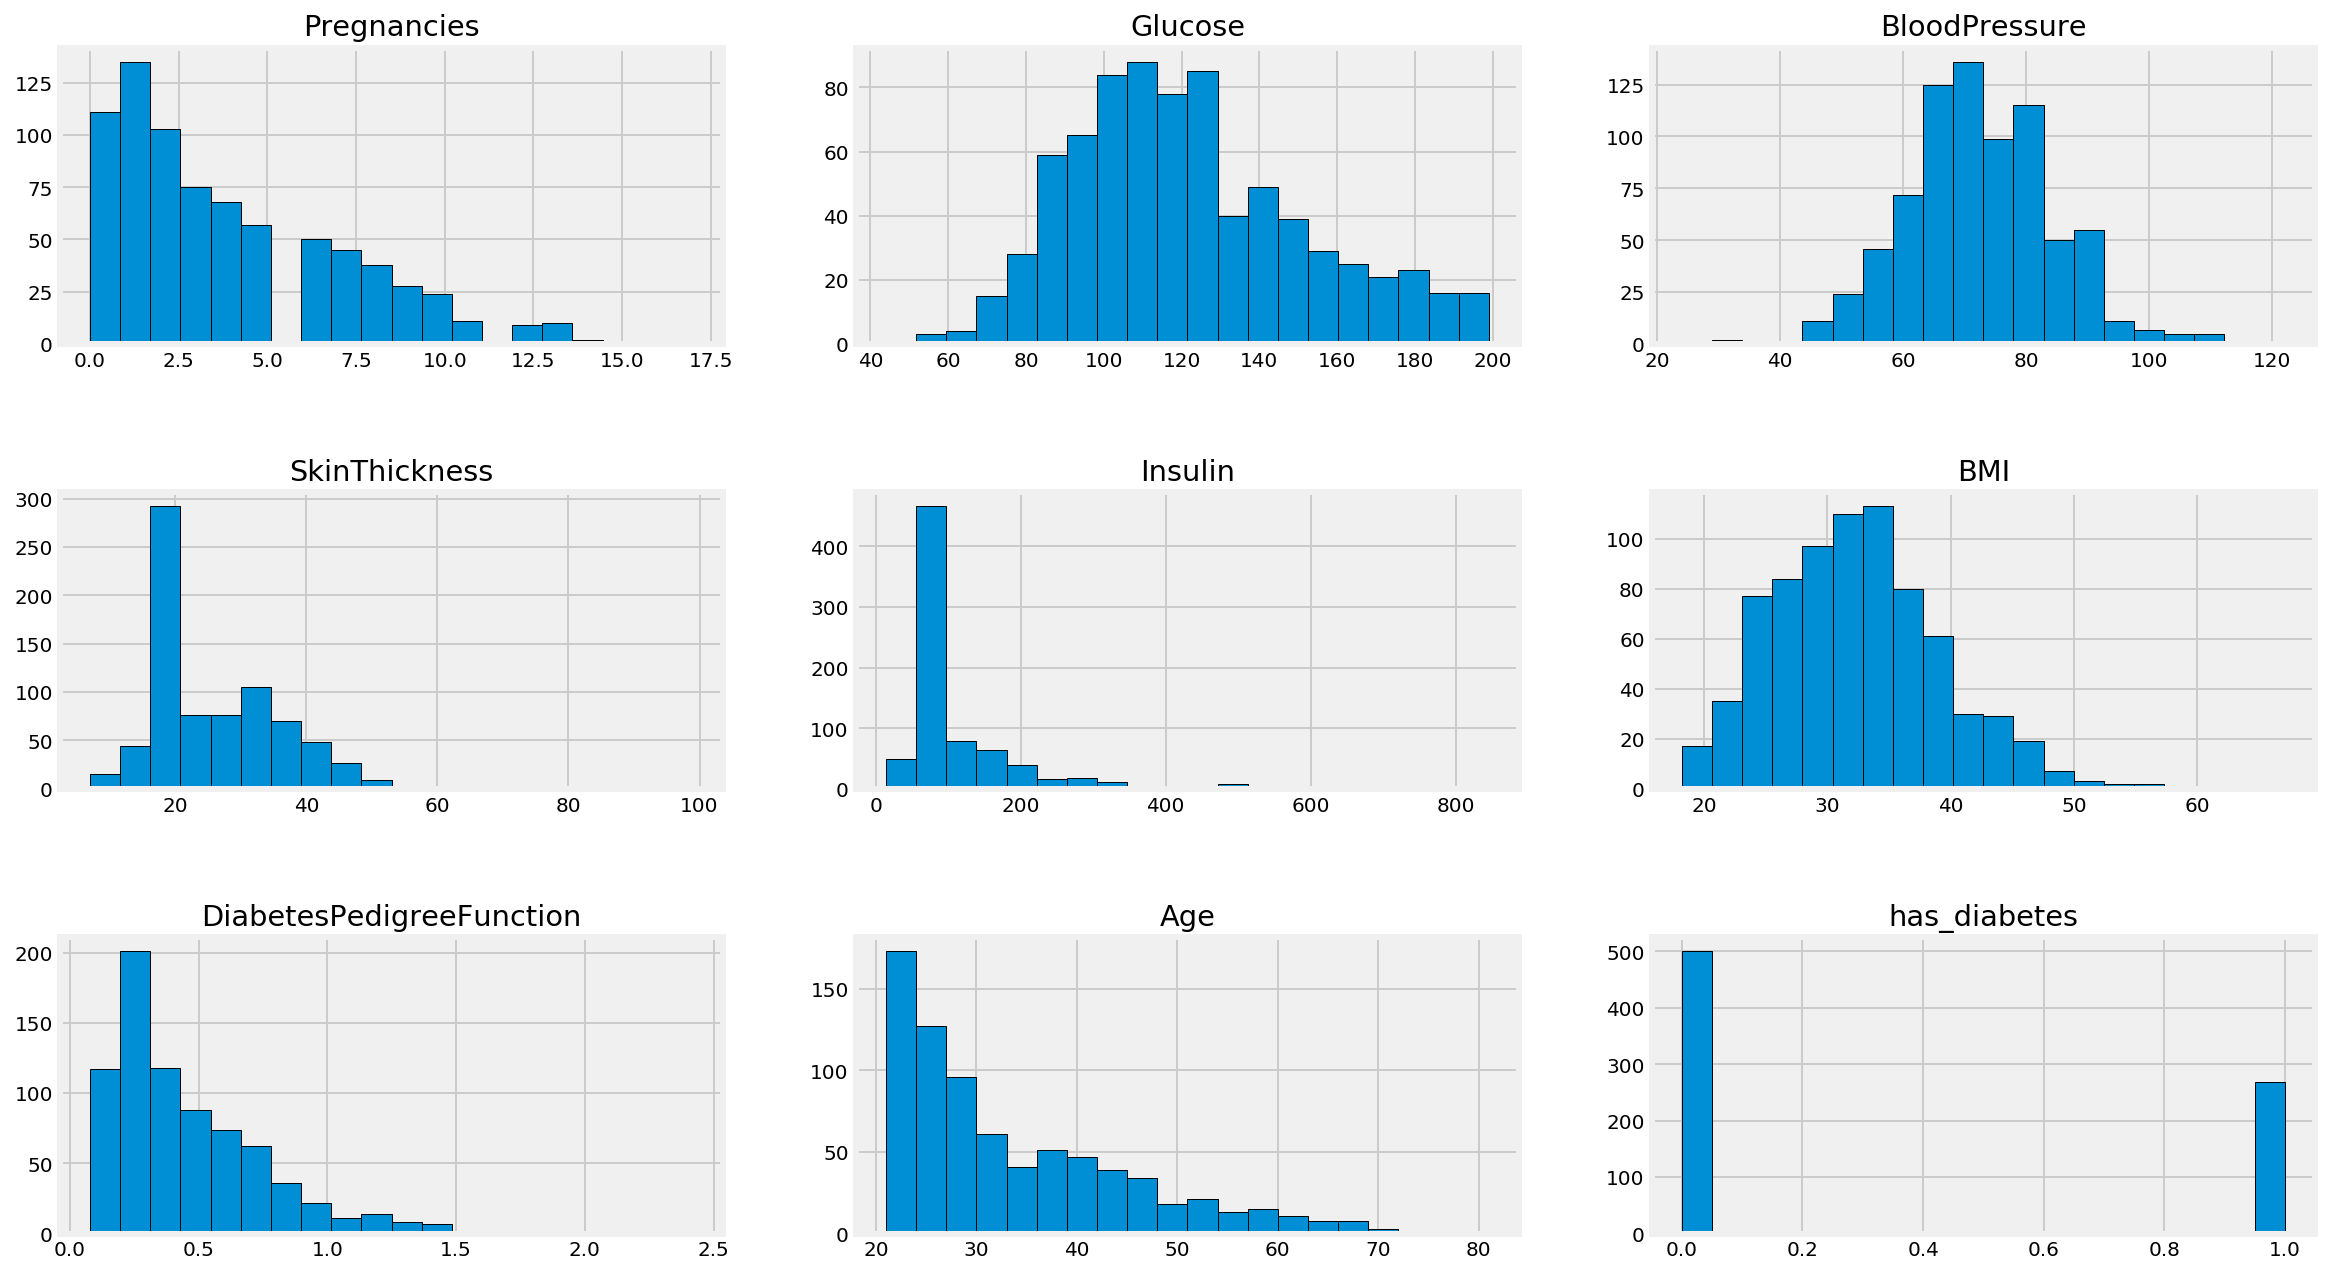

In [23]:
#Using Histograms to visualize the ditribution of all features 

columns=diabetes.columns[:9]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

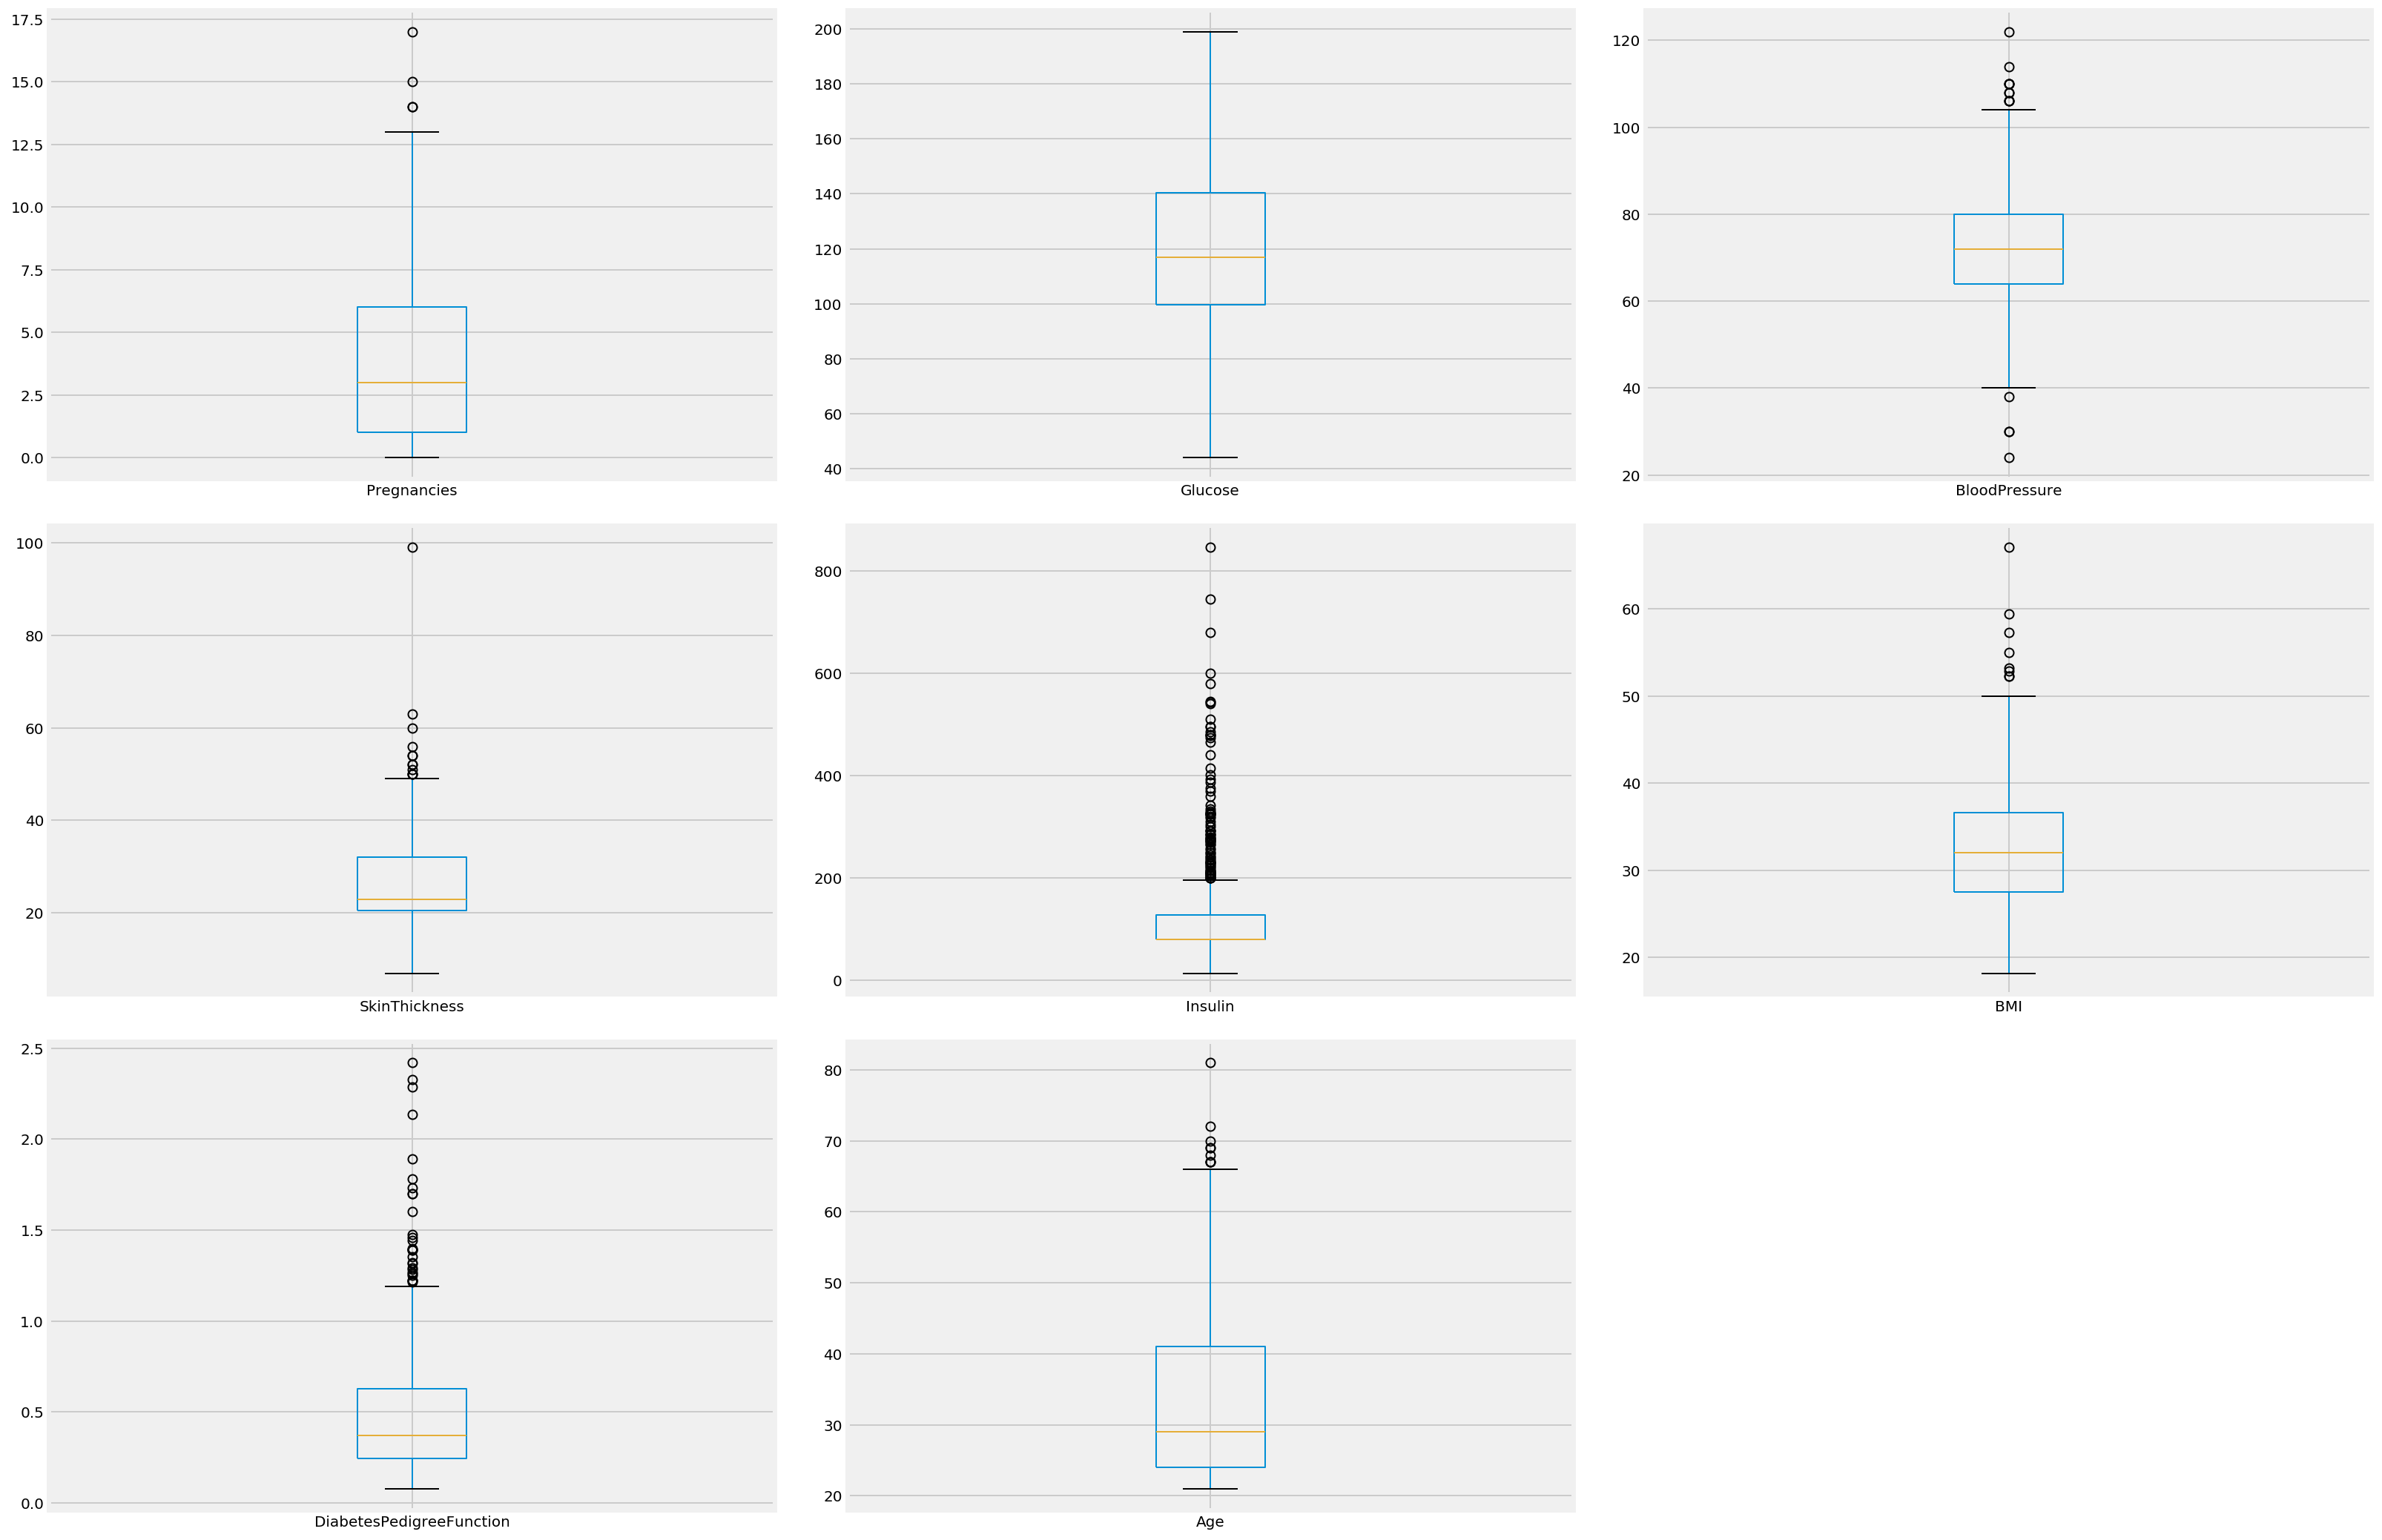

In [24]:
# using boxplots to visualize the outliers

columns=diabetes.columns[:8]
plt.subplots(figsize=(25,25))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.1,hspace=0.1)
    diabetes.boxplot([i])
plt.show()

In [25]:
# comparing (mean,median, maximum values ...etc) to make sure if we have outliers or not.

diabetes.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000   1.000000   
Glucose                   768.0  121.681605  30.436016  44.000  99.750000   
BloodPressure             768.0   72.254807  12.115932  24.000  64.000000   
SkinThickness             768.0   26.606479   9.631241   7.000  20.536458   
Insulin                   768.0  118.660163  93.080358  14.000  79.799479   
BMI                       768.0   32.450805   6.875374  18.200  27.500000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078   0.243750   
Age                       768.0   33.240885  11.760232  21.000  24.000000   
has_diabetes              768.0    0.348958   0.476951   0.000   0.000000   

                                 50%        75%     max  
Pregnancies                 3.000000    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.000000   80.00000  122.00  
SkinThickness              23.000000   32.00000   99.00  
Insulin                    79.799479  127.25000  846.00  
BMI                        32.000000   36.60000   67.10  
DiabetesPedigreeFunction    0.372500    0.62625    2.42  
Age                        29.000000   41.00000   81.00  
has_diabetes                0.000000    1.00000    1.00

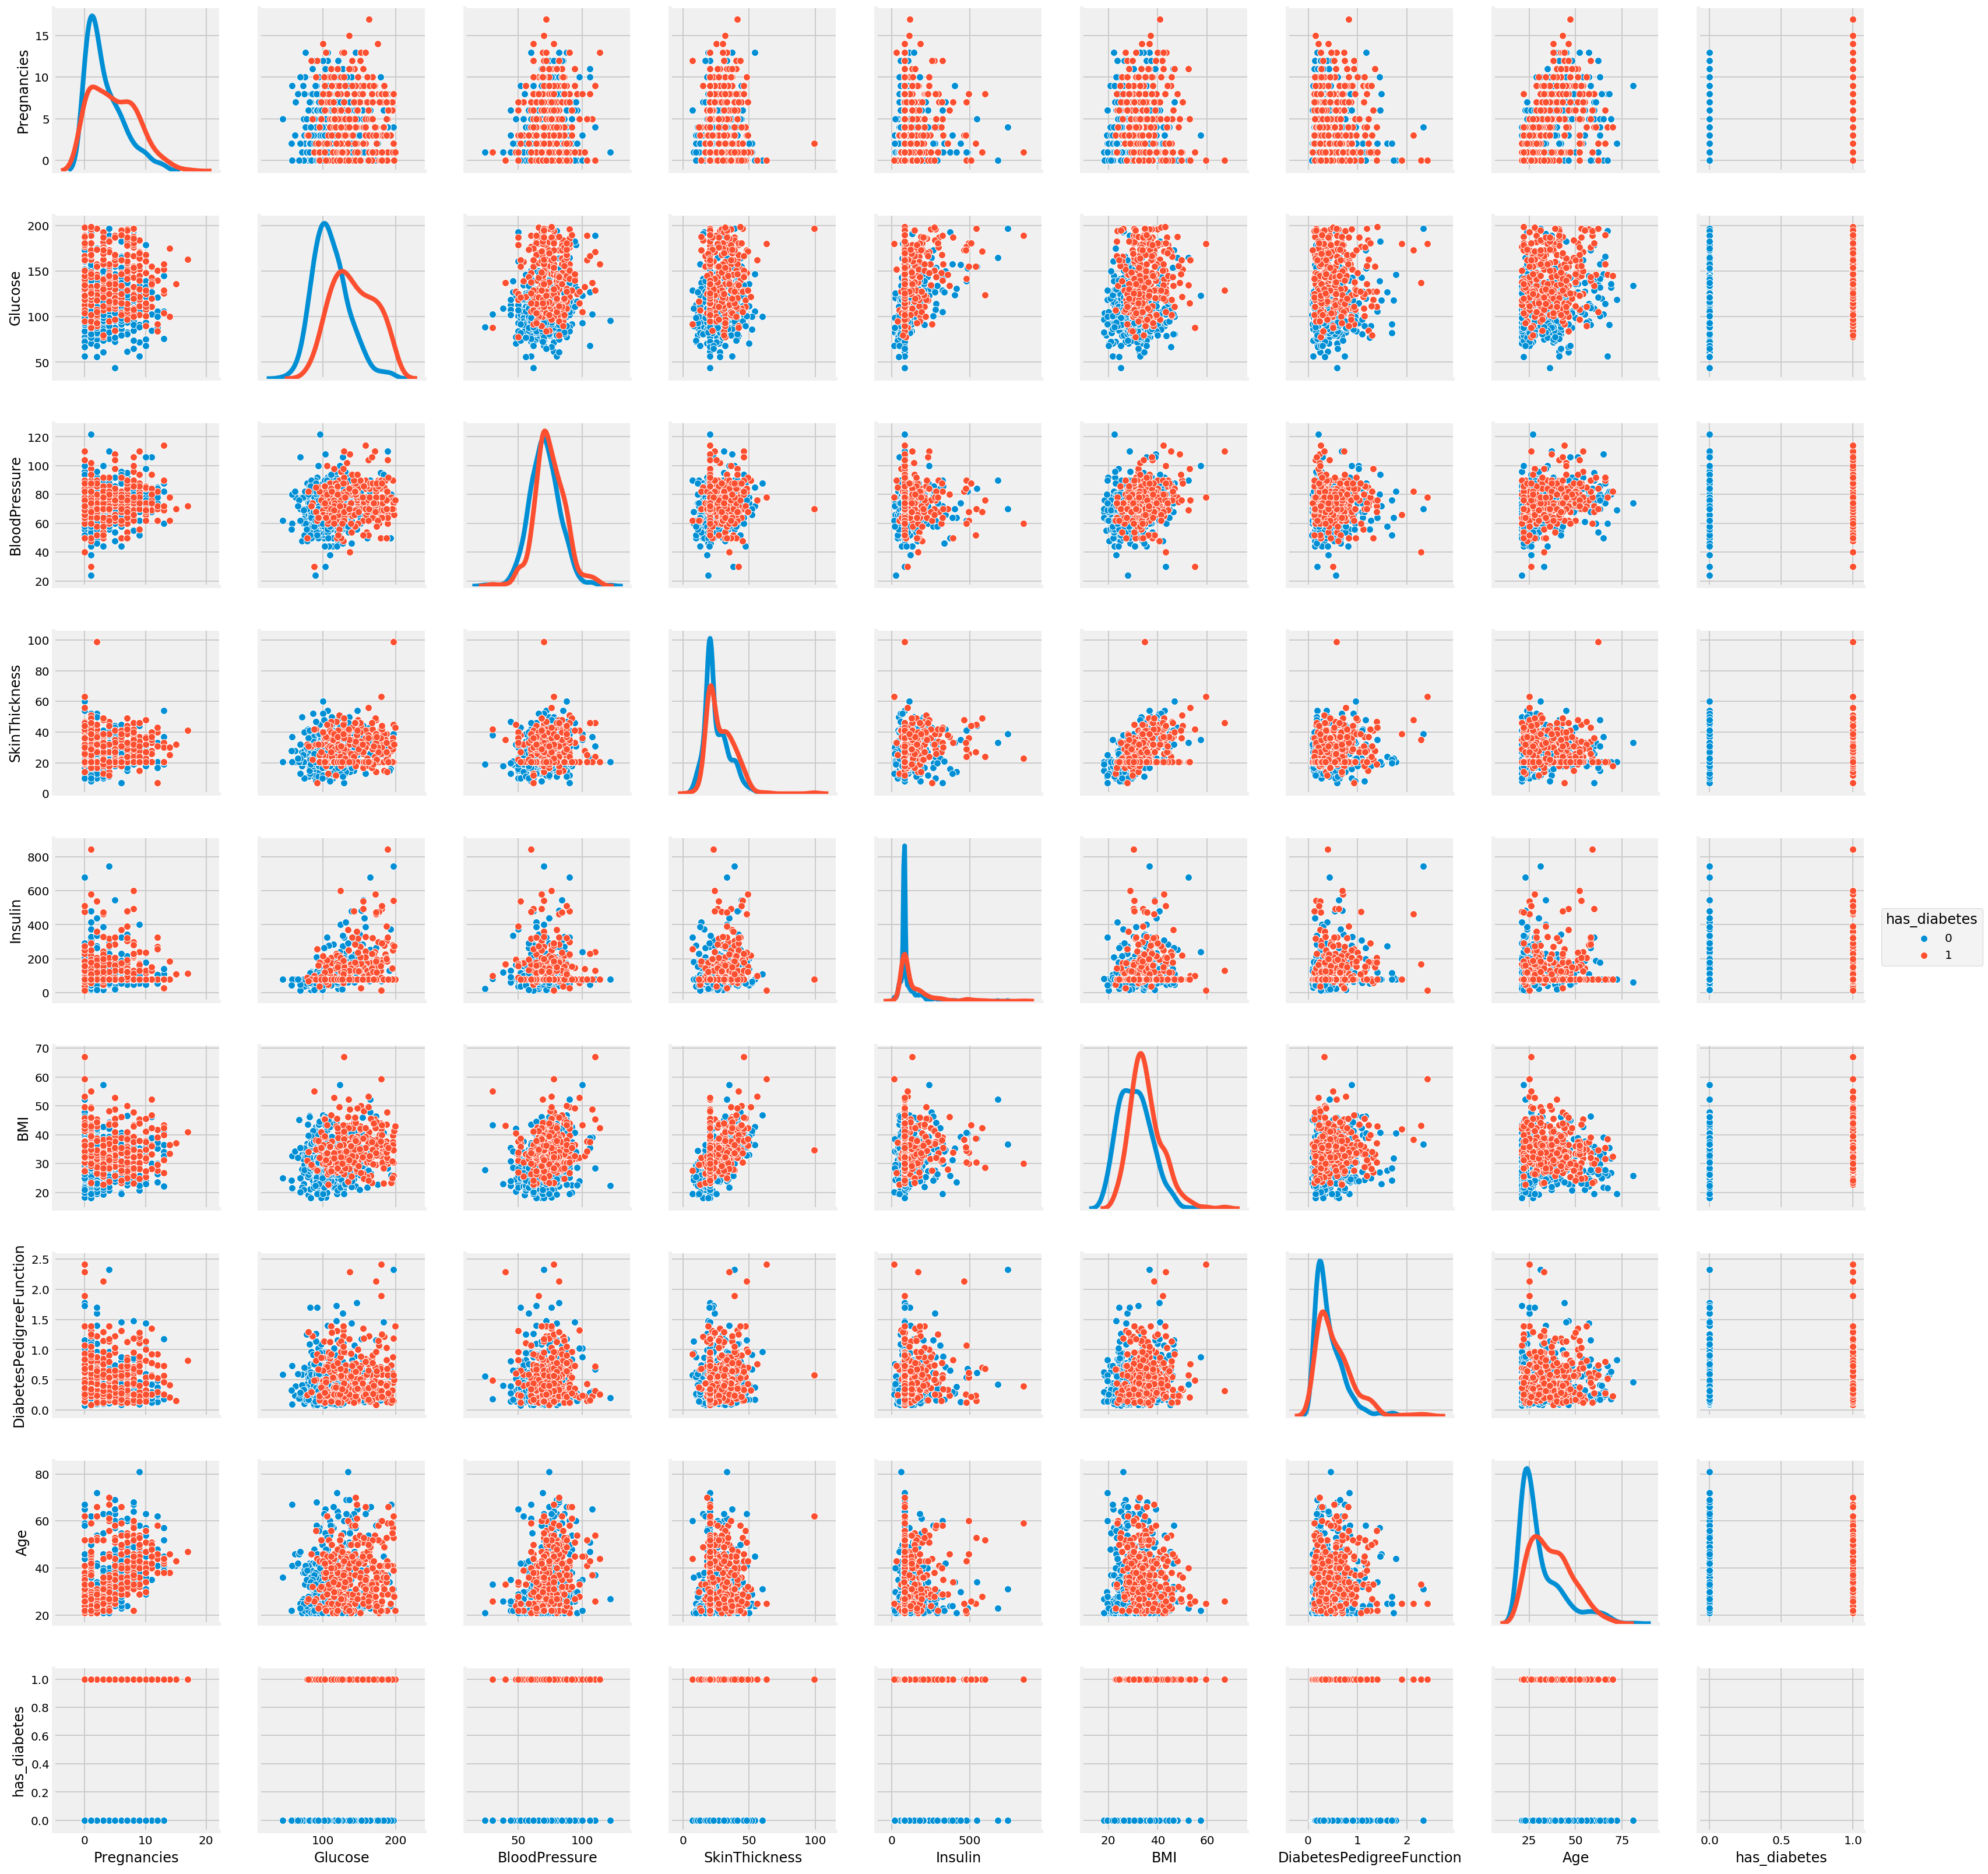

In [26]:
#using Pair plot to explore relationship between any two variables 

sns.pairplot(data=diabetes,hue='has_diabetes',diag_kind='kde')
plt.show();

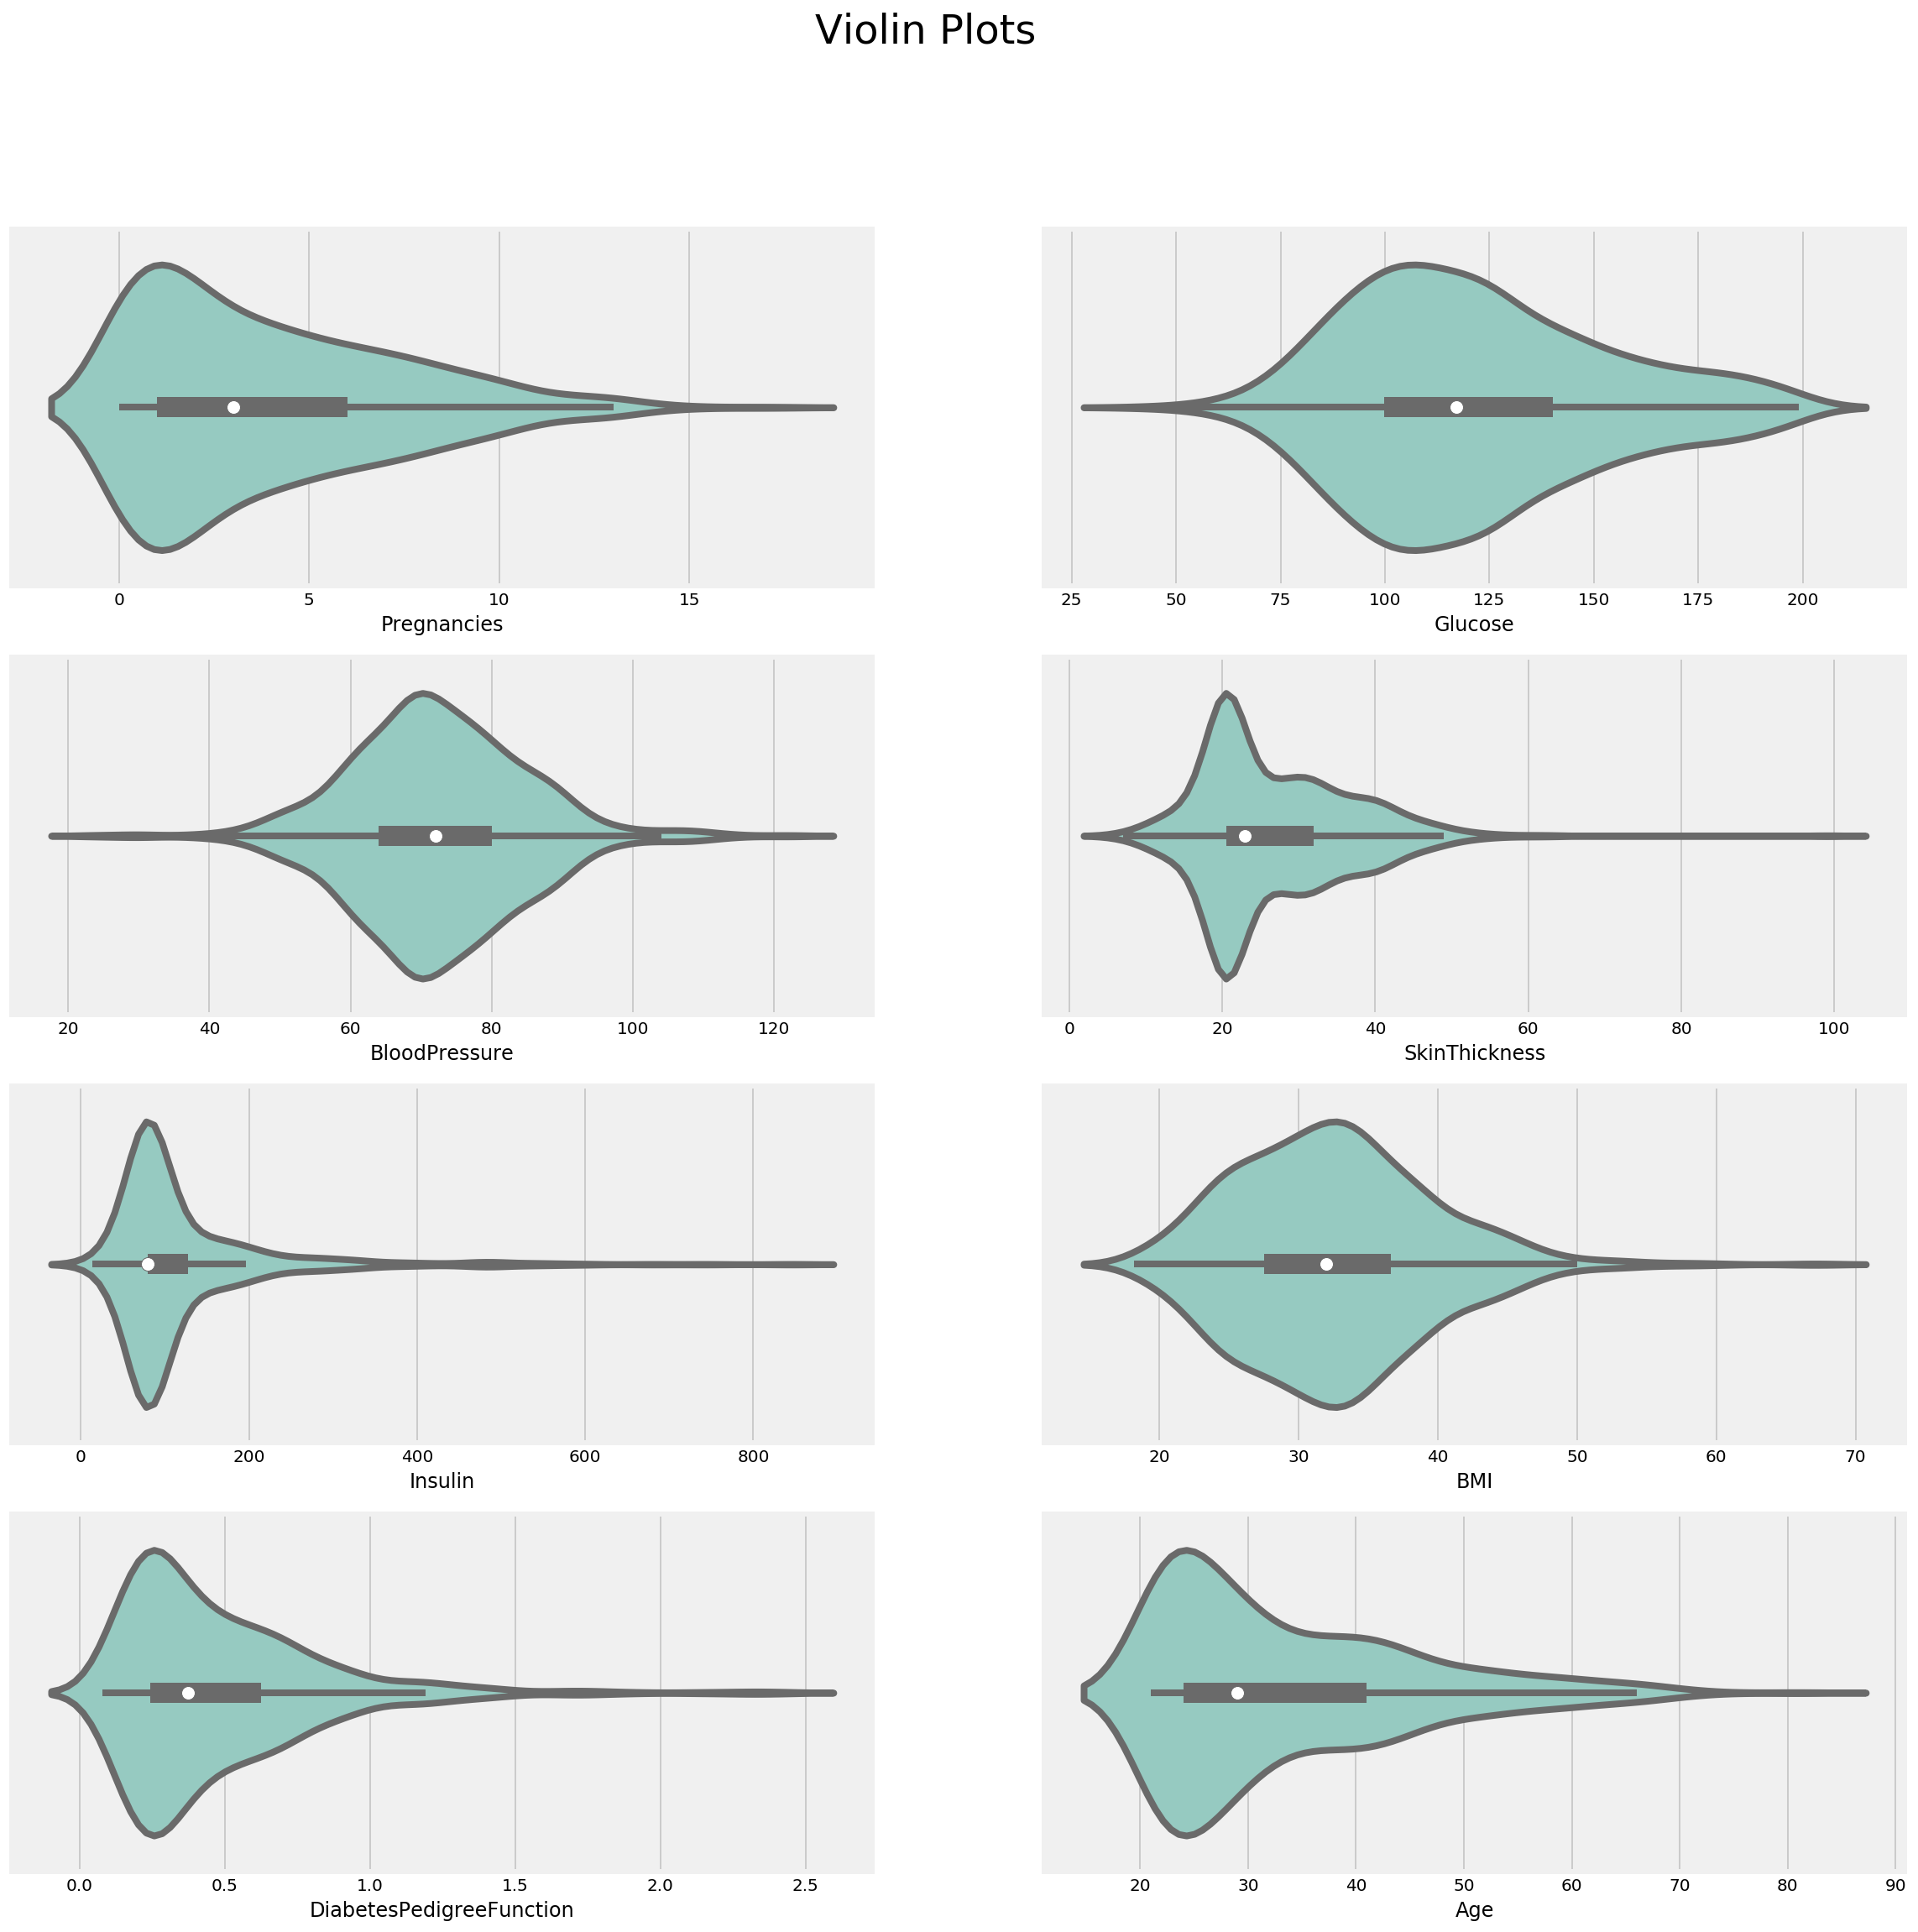

In [27]:
# using violin plots to show the probability density of the data at different values

fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="Pregnancies", data=diabetes,ax=ax[0,0],palette='Set3')
sns.violinplot(x="Glucose", data=diabetes,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='BloodPressure', data=diabetes, ax=ax[1,0], palette='Set3')
sns.violinplot(x='SkinThickness', data=diabetes, ax=ax[1,1],palette='Set3')
sns.violinplot(x='Insulin', data=diabetes, ax=ax[2,0], palette='Set3')
sns.violinplot(x='BMI', data=diabetes, ax=ax[2,1],palette='Set3')
sns.violinplot(x='DiabetesPedigreeFunction', data=diabetes, ax=ax[3,0],palette='Set3')
sns.violinplot(x='Age', data=diabetes, ax=ax[3,1],palette='Set3')
plt.show()

A violin plot is a method of plotting numeric data. It is similar to box plot with a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values (in the simplest case this could be a histogram).

A violin plot is more informative than a plain box plot. In fact while a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). In this case a violin plot clearly shows the presence of different peaks, their position and relative amplitude. This information could not be represented with a simple box plot which only reports summary statistics. The inner part of a violin plot usually shows the mean (or median) and the interquartile range.

# Remove outliers

#### I am going to use two differernt datasets in modeling:
#### 1- dataset contains outliers
#### 2- dataset after dropping outliers

### First: dataset contains outliers

In [28]:
diabetes.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0            6    148.0           72.0           35.0  79.799479  33.6   
1            1     85.0           66.0           29.0  79.799479  26.6   

   DiabetesPedigreeFunction  Age  has_diabetes  
0                     0.627   50             1  
1                     0.351   31             0

### Second: Dataset after dropping outliers:

In [29]:
diabetes_no_outlier = diabetes.copy()
diabetes_no_outlier.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0            6    148.0           72.0           35.0  79.799479  33.6   
1            1     85.0           66.0           29.0  79.799479  26.6   

   DiabetesPedigreeFunction  Age  has_diabetes  
0                     0.627   50             1  
1                     0.351   31             0

In [30]:
#Function to define outliers
def define_outliers(column):
    Q1=np.percentile(diabetes[column], 25)
    Q3=np.percentile(diabetes[column], 75)
    IQR = Q3-Q1
    above_median = Q3 + (1.5*IQR)
    below_median = Q1 - (1.5*IQR)
    return above_median ,below_median

##### Drop outliers for SkinThickness

In [31]:
# save the result
above_median ,below_median = define_outliers('SkinThickness')
 
# Drop outliers
diabetes_no_outlier = diabetes_no_outlier.drop(diabetes_no_outlier[diabetes_no_outlier['SkinThickness'] > above_median].index, axis=0)
diabetes_no_outlier = diabetes_no_outlier.drop(diabetes_no_outlier[diabetes_no_outlier['SkinThickness'] < below_median].index, axis=0)

In [32]:
diabetes_no_outlier.shape

(756, 9)

##### Drop outliers for Insulin

In [33]:
# save the result
above_median ,below_median = define_outliers('Insulin')
 
# Drop outliers
diabetes_no_outlier = diabetes_no_outlier.drop(diabetes_no_outlier[diabetes_no_outlier['Insulin'] > above_median].index, axis=0)
diabetes_no_outlier = diabetes_no_outlier.drop(diabetes_no_outlier[diabetes_no_outlier['Insulin'] < below_median].index, axis=0)

In [34]:
diabetes_no_outlier.shape

(669, 9)

##### Drop outliers for BMI

In [35]:
# save the result
above_median ,below_median = define_outliers('BMI')
 
# Drop outliers
diabetes_no_outlier = diabetes_no_outlier.drop(diabetes_no_outlier[diabetes_no_outlier['BMI'] > above_median].index, axis=0)
diabetes_no_outlier = diabetes_no_outlier.drop(diabetes_no_outlier[diabetes_no_outlier['BMI'] < below_median].index, axis=0)

In [36]:
diabetes_no_outlier.shape

(665, 9)

##### Drop outliers for DiabetesPedigreeFunction

In [37]:
# save the result
above_median ,below_median = define_outliers('DiabetesPedigreeFunction')
 
# Drop outliers
diabetes_no_outlier = diabetes_no_outlier.drop(diabetes_no_outlier[diabetes_no_outlier['DiabetesPedigreeFunction'] > above_median].index, axis=0)
diabetes_no_outlier = diabetes_no_outlier.drop(diabetes_no_outlier[diabetes_no_outlier['DiabetesPedigreeFunction'] < below_median].index, axis=0)

In [38]:
diabetes_no_outlier.shape

(642, 9)

In [39]:
# Read the target after dropping outliers
print('Number of Patients who have diabetes = {} \nNumber of Patients who don\'t have diabetes = {}'.format((diabetes_no_outlier.has_diabetes == 1).sum(),(diabetes_no_outlier.has_diabetes == 0).sum()))

Number of Patients who have diabetes = 201 
Number of Patients who don't have diabetes = 441


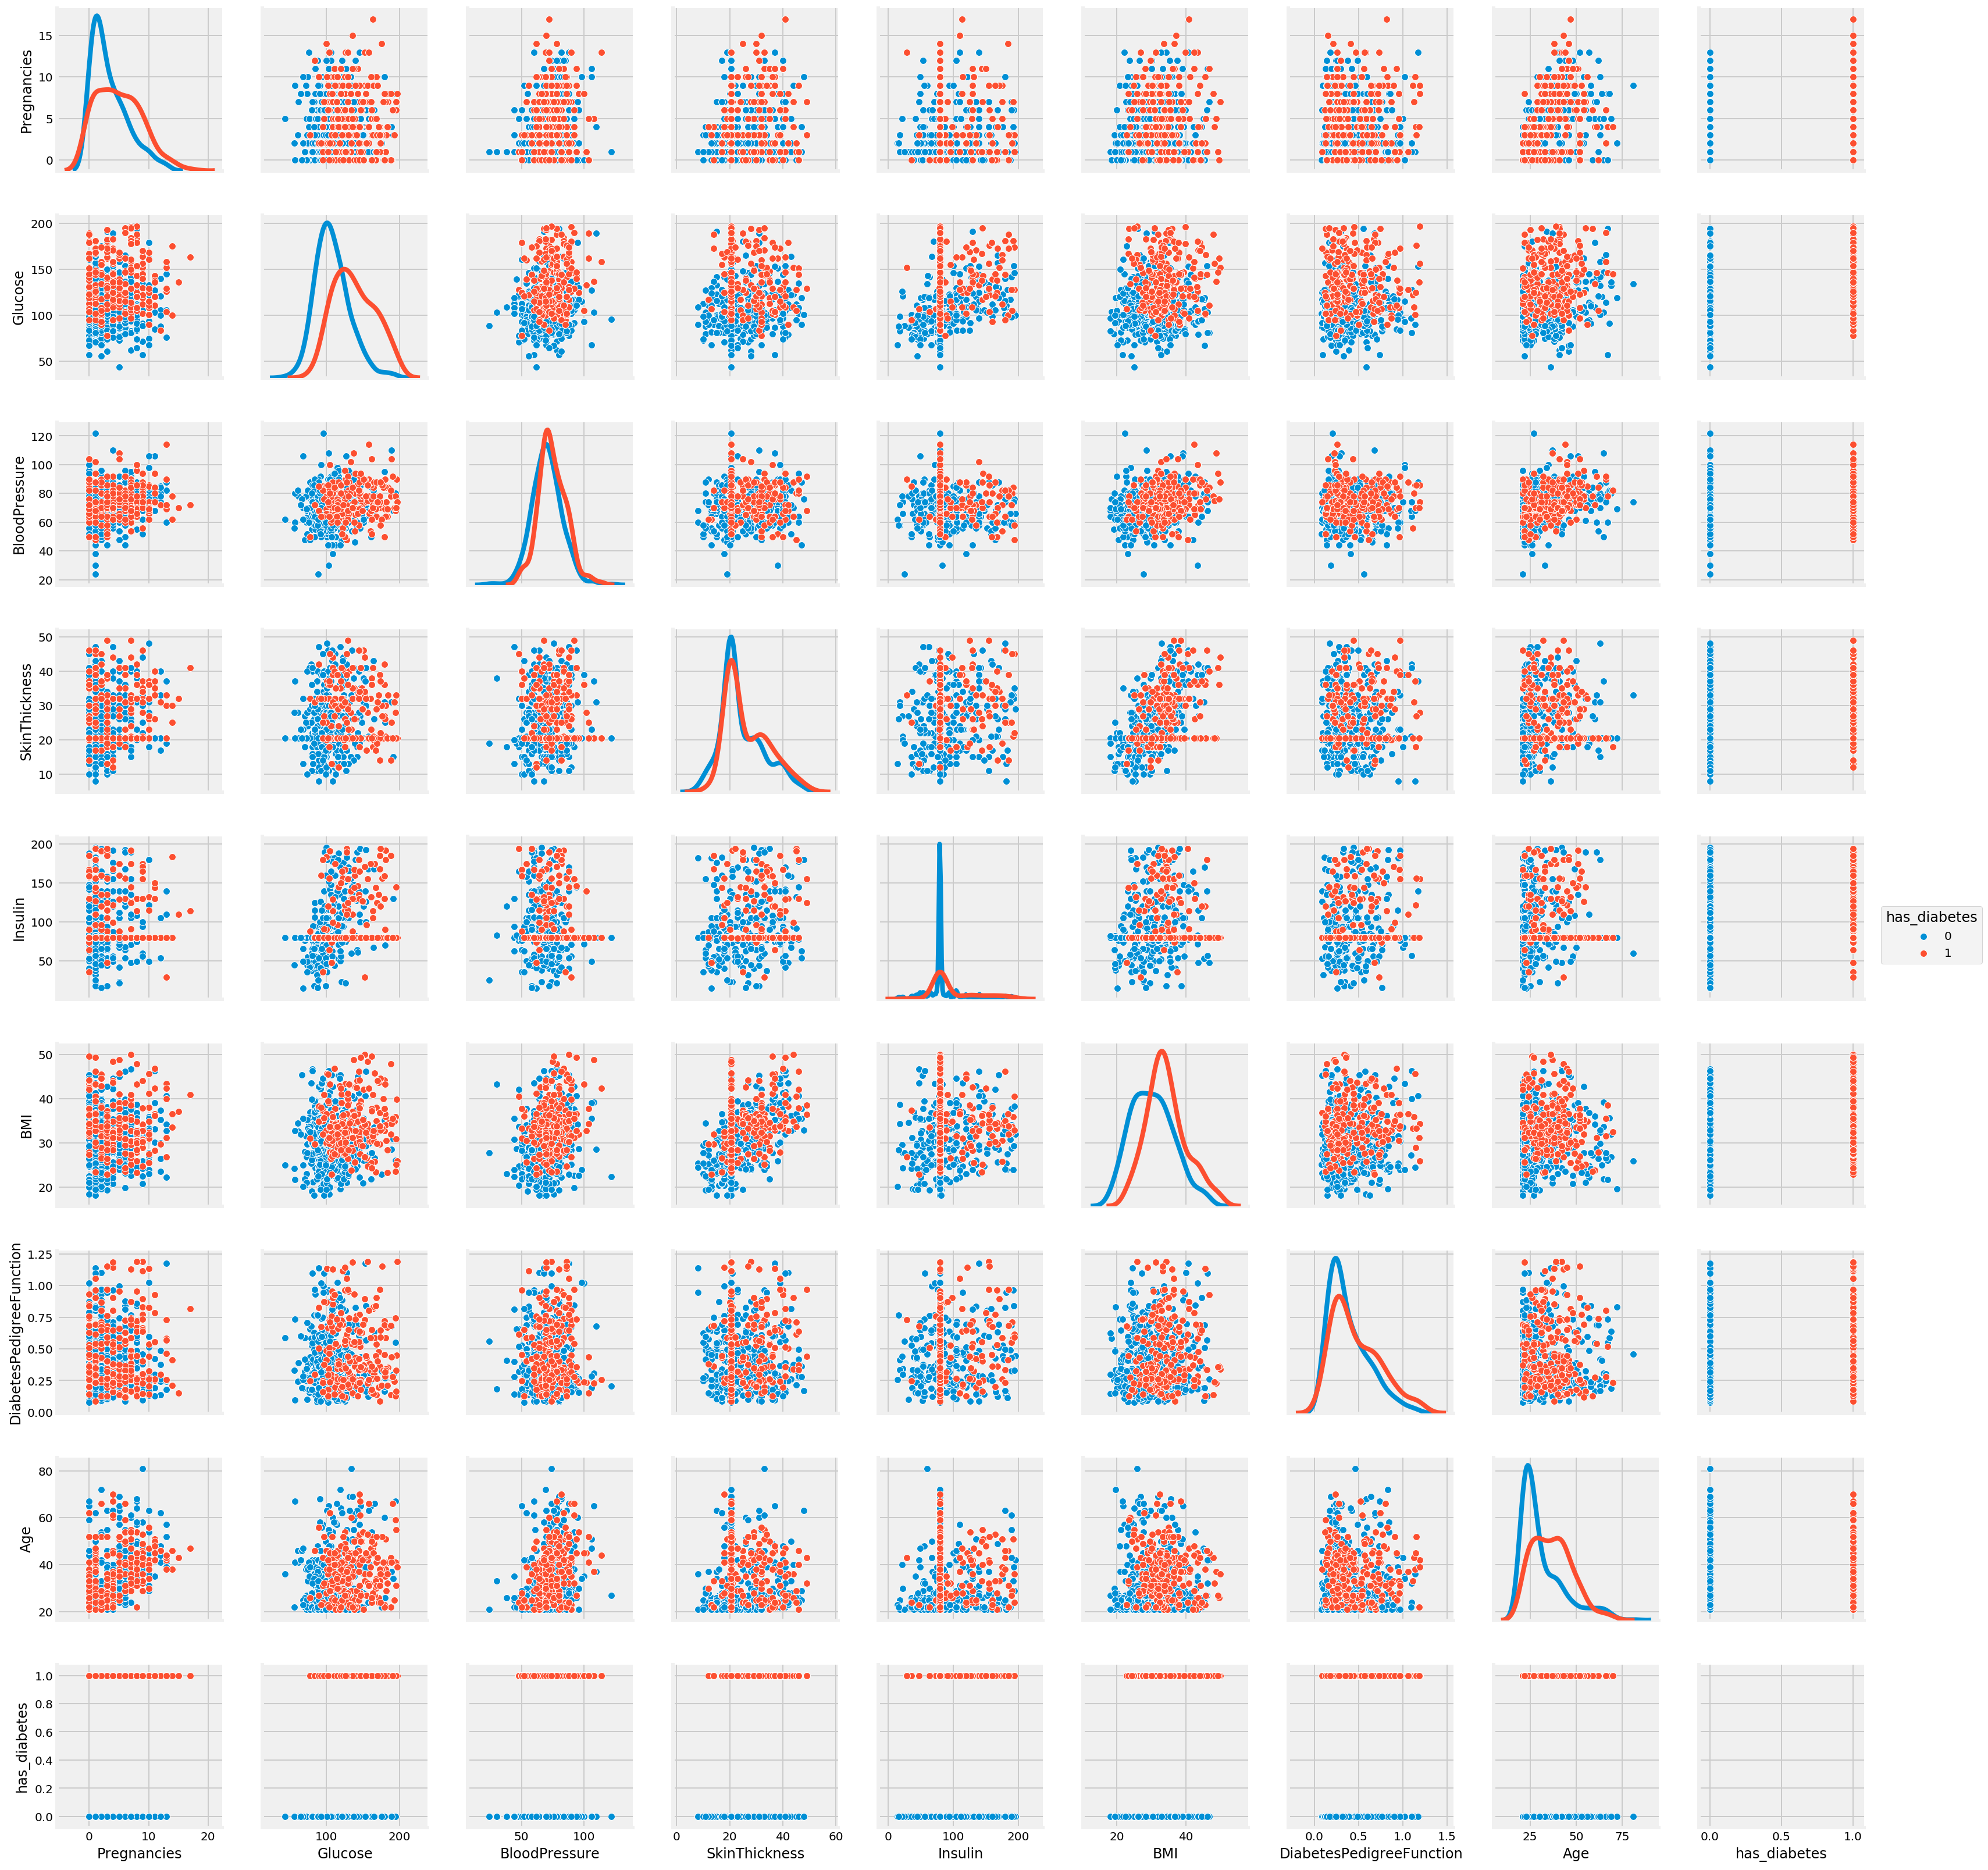

In [40]:
#Visualize features distribution after removing outliers
sns.pairplot(data=diabetes_no_outlier,hue='has_diabetes',diag_kind='kde')
plt.show();

### 6. Find Correlation between features

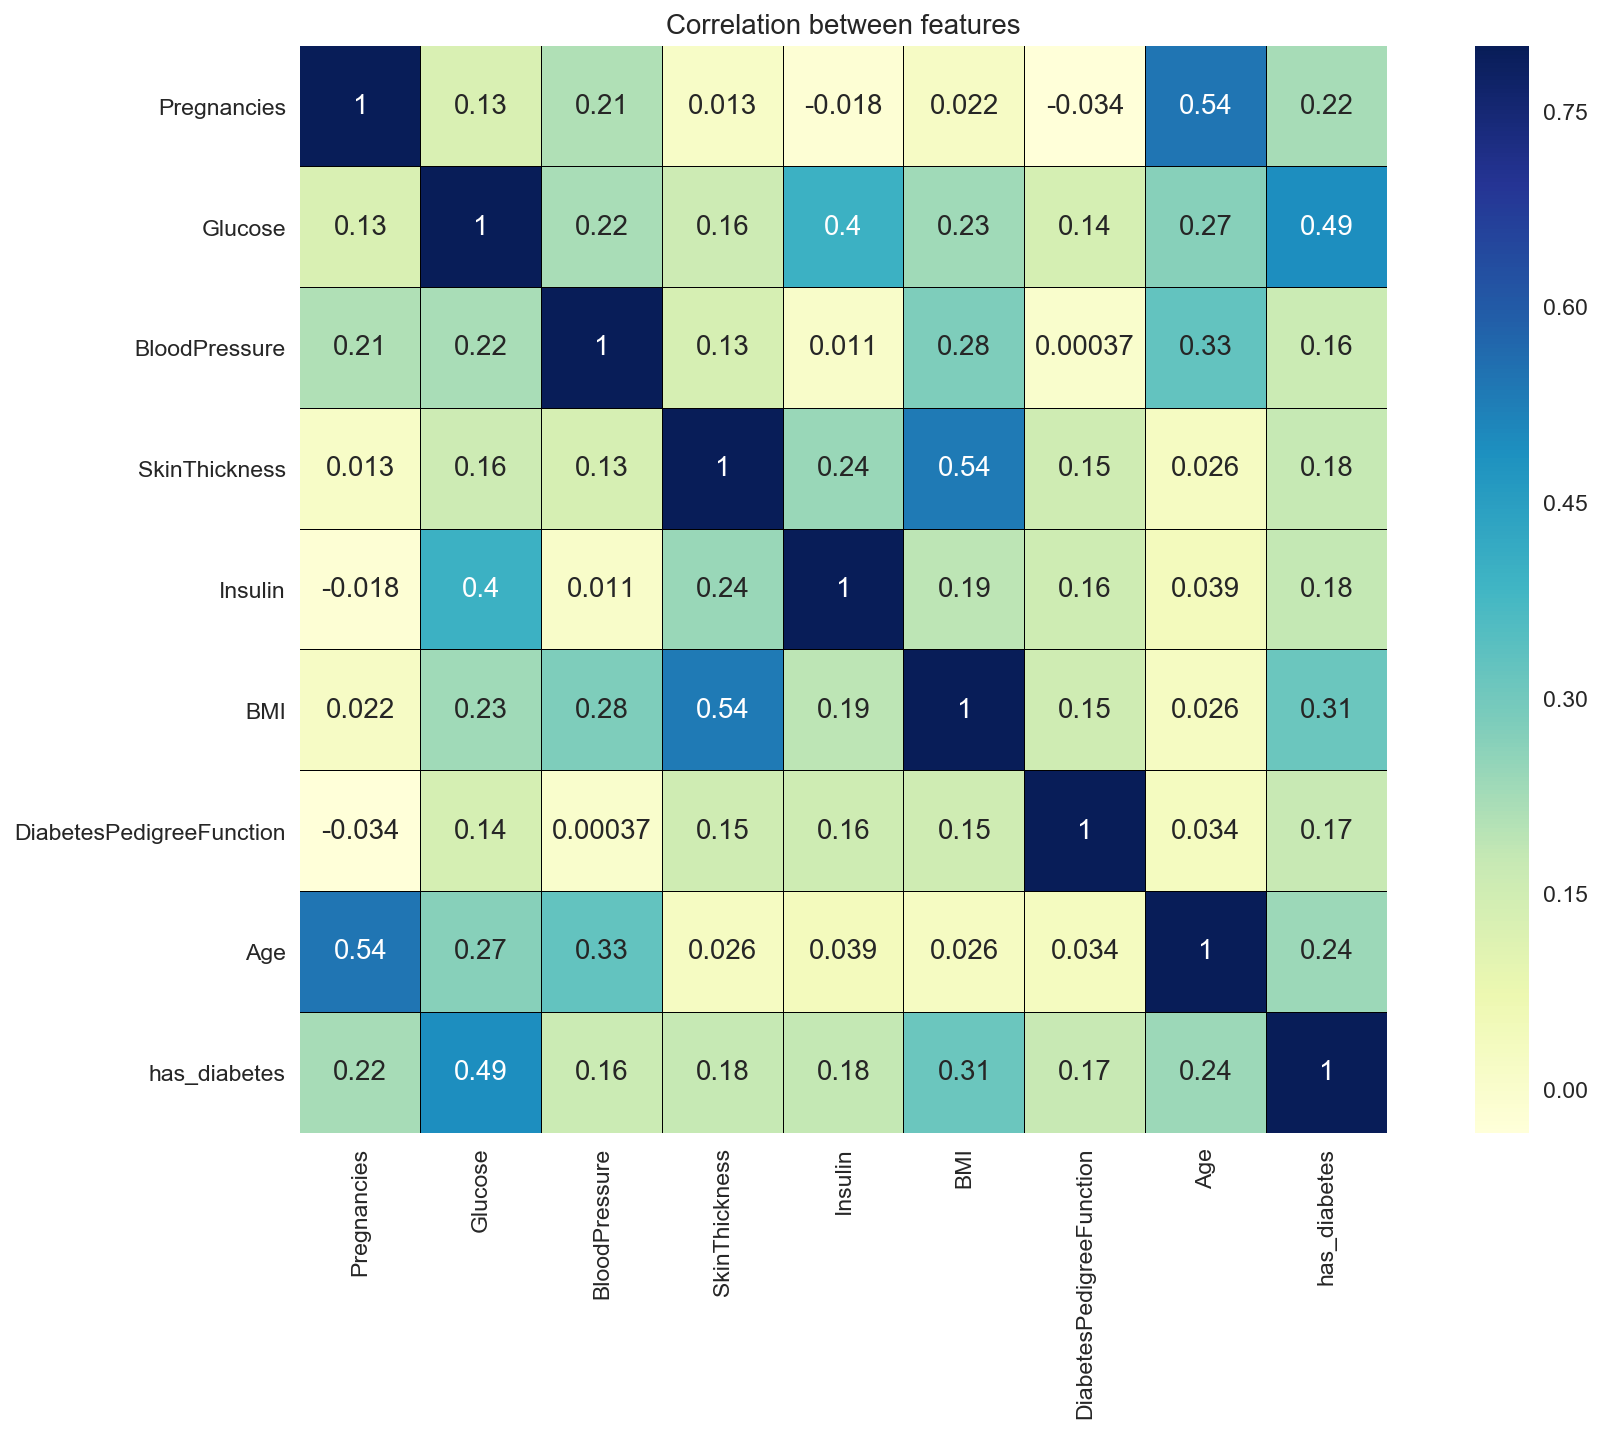

In [41]:
# using heatmap to find correlation between features
corr=diabetes.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

**All correlations were below 50%, and the highest correlation was between the target and Glucose percentage (49%).**

### 7. Get the importance of features

In [42]:
# I will use random forest to get the importance of features in orderto help me in features selection
clf = RandomForestClassifier()
x=diabetes[diabetes.columns[:8]]
y=diabetes.has_diabetes
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

0
Glucose                   0.264915
BMI                       0.155471
DiabetesPedigreeFunction  0.132755
Age                       0.129391
BloodPressure             0.094294
Pregnancies               0.081811
Insulin                   0.072519
SkinThickness             0.068845

In [43]:
# get the importance of features After removing outliers
clf = RandomForestClassifier()
x=diabetes_no_outlier[diabetes_no_outlier.columns[:8]]
y=diabetes_no_outlier.has_diabetes
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

0
Glucose                   0.216242
BMI                       0.178401
Age                       0.155901
DiabetesPedigreeFunction  0.127568
BloodPressure             0.099275
Pregnancies               0.081058
Insulin                   0.073139
SkinThickness             0.068416

* **I got the same top four features for both datasets: (diabetes & diabetes_no_outlier)**
* **I will compare the model performance before and after choosing the top four important features.**

### 8. Standardization

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. it used before most models' types.

### First: standardization the first dataset (with outliers)

#### 1. standardizing all features

In [44]:
diabetes2=diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','has_diabetes']]

features=diabetes2[diabetes2.columns[:8]]
features_standard=StandardScaler().fit_transform(features) # Gaussian Standardization

#features
X2=pd.DataFrame(features_standard,columns=[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

#target
y2=diabetes2['has_diabetes']

#### 2. standardizing the most four important features

In [45]:
diabetes3=diabetes[['Glucose','BMI','Age','DiabetesPedigreeFunction','has_diabetes']]

features=diabetes3[diabetes3.columns[:4]]
features_standard=StandardScaler().fit_transform(features) # Gaussian Standardization

#features
X3=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])

#target
y3=diabetes3['has_diabetes']

### Second: standardization the second dataset (AFTER dropping outliers)

#### 1.standardizing all features

In [46]:
diabetes4=diabetes_no_outlier[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','has_diabetes']]

features=diabetes4[diabetes4.columns[:8]]
features_standard=StandardScaler().fit_transform(features) # Gaussian Standardization

#features
X4=pd.DataFrame(features_standard,columns=[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

# target
y4=diabetes4['has_diabetes']

#### 2. standardizing the most four important features

In [47]:
diabetes5=diabetes_no_outlier[['Glucose','BMI','Age','DiabetesPedigreeFunction','has_diabetes']]

features=diabetes5[diabetes5.columns[:4]]
features_standard=StandardScaler().fit_transform(features) # Gaussian Standardization

# Features
X5=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])

# target
y5=diabetes5['has_diabetes']

<img src="https://msr7.net/images/separator-lines-10.png" style="float: center; height: 60px; width: 900px">    

## Step 3: Modeling

**In this dataset, I have four aspects to keep in consideration in order to improve the model performance:**
* **First:** I have a lot of outliers but I wasn't sure if they are wrong values or correct skewed values, nothing mentioned in the dataset description about those values. For this reason I made two datasets and I will try each model on each dataset.
* **Second:** I do not have enough data to creat a validation set so I will use k fold cross validation to pick the best model.
* **Third:** I have a quite imbalanced dataset, and to solve this problem I will set the input parameter **class_weight="balanced"** to my model. The “balanced” mode will make the classes automatically weighted inversely proportional to how frequently they appear in the data.
* **Fourth:** I will compare the performance for each model before and after features selection.

<img src="https://preview.ibb.co/hhRYdA/modeling-summary.png" style="float: center; height: 400px; width: 800px">


### First: Modeling by using the first dataset BEFORE removing outliers

### 1. Logistic Regression:

#### Using All Features + Imbalanced classes:

In [48]:
# LR without using parameter (class_weight="balanced")

logreg = LogisticRegression(C=100)
score1 = round(cross_val_score(logreg, X2, y2, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Logistic Regression Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score1*100))

The score for Logistic Regression Model BEFORE fixing Imbalanced classes (with outliers) is: 77.0%


In [49]:
#list to store all models scores (with outliers)
models = []

model = {'Model_name': 'Logistic Regression',
         'Outliers': 'YES',
         'All features': 'YES',
         'Balanced_Classes': 'No',
         'Accuracy': str(score1*100) +"%"}

models.append(model)

#### Using All Features + Balanced classes:

In [50]:
# LR using parameter (class_weight="balanced")

logreg = LogisticRegression(C=100, class_weight='balanced')
score2 = round(cross_val_score(logreg, X2, y2, cv=5,scoring="accuracy").mean(),2)
print ("The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score2*100))

The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: 75.0%


In [51]:
model = {'Model_name': 'Logistic Regression',
         'Outliers': 'YES',
         'All features': 'YES',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score2*100) +"%"}

models.append(model)

#### Using Some Features + Imbalanced classes:

In [52]:
# LR without using parameter (class_weight="balanced")

logreg = LogisticRegression(C=100)
score3 = round(cross_val_score(logreg, X3, y3, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Logistic Regression Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score3*100))

The score for Logistic Regression Model BEFORE fixing Imbalanced classes (with outliers) is: 77.0%


In [53]:
model = {'Model_name': 'Logistic Regression',
         'Outliers': 'YES',
         'All features': 'NO',
         'Balanced_Classes': 'NO',
         'Accuracy': str(score3*100) +"%"}

models.append(model)

#### Using Some Features + Balanced classes:

In [54]:
# LR using parameter (class_weight="balanced")

logreg = LogisticRegression(C=100, class_weight='balanced')
score4 = round(cross_val_score(logreg, X3, y3, cv=5,scoring="accuracy").mean(),2)
print ("The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score4*100))

The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: 75.0%


In [55]:
model = {'Model_name': 'Logistic Regression',
         'Outliers': 'YES',
         'All features': 'NO',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score4*100) +"%"}

models.append(model)

### 2. Random Forest Classifier

#### Using All Features + Imbalanced classes:

In [56]:
# RF without using parameter (class_weight="balanced")

rndForestClass = RandomForestClassifier(n_jobs=-1, criterion='entropy')
score5 = round(cross_val_score(rndForestClass, X2, y2, cv=5,scoring="accuracy").mean(),2)
print ("The score for Random Forest Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score5*100))


The score for Random Forest Model BEFORE fixing Imbalanced classes (with outliers) is: 74.0%


In [57]:
model = {'Model_name': 'Random Forest Classifier',
         'Outliers': 'YES',
         'All features': 'YES',
         'Balanced_Classes': 'No',
         'Accuracy': str(score5*100) +"%"}

models.append(model)

#### Using All Features + Balanced classes:

In [58]:
# RF using parameter (class_weight="balanced")

rndForestClass = RandomForestClassifier(n_jobs=-1, criterion='entropy', class_weight='balanced')
score6 = round(cross_val_score(rndForestClass, X2, y2, cv=5,scoring="accuracy").mean(),2)
print ("The score for Random Forest Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score6*100))

The score for Random Forest Model AFTER fixing Imbalanced classes (with outliers) is: 74.0%


In [59]:
model = {'Model_name': 'Random Forest Classifier',
         'Outliers': 'YES',
         'All features': 'YES',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score6*100) +"%"}

models.append(model)

#### Using Some Features + Imbalanced classes:

In [60]:
# RF without using parameter (class_weight="balanced")

rndForestClass = RandomForestClassifier(n_jobs=-1, criterion='entropy')
score7 = round(cross_val_score(rndForestClass, X3, y3, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Random Forest Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score7*100))

The score for Random Forest Model BEFORE fixing Imbalanced classes (with outliers) is: 75.0%


In [61]:
model = {'Model_name': 'Random Forest Classifier',
         'Outliers': 'YES',
         'All features': 'NO',
         'Balanced_Classes': 'NO',
         'Accuracy': str(score7*100) +"%"}

models.append(model)

#### Using Some Features + Balanced classes:

In [62]:
# RF using parameter (class_weight="balanced")

rndForestClass = RandomForestClassifier(n_jobs=-1, criterion='entropy', class_weight='balanced')
score8 = round(cross_val_score(rndForestClass, X3, y3, cv=5,scoring="accuracy").mean(),2)
print ("The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score8*100))

The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: 74.0%


In [63]:
model = {'Model_name': 'Random Forest Classifier',
         'Outliers': 'YES',
         'All features': 'NO',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score8*100) +"%"}

models.append(model)

### 3. Decision Tree

#### Using All Features + Imbalanced classes:

In [64]:
# Decision tree without using parameter (class_weight="balanced")

dtclf = DecisionTreeClassifier()
score9 = round(cross_val_score(dtclf, X2, y2, cv=5,scoring="accuracy").mean(),2)
print ("The score for Decision tree Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score9*100))

The score for Decision tree Model BEFORE fixing Imbalanced classes (with outliers) is: 71.0%


In [65]:
model = {'Model_name': 'Decision tree',
         'Outliers': 'YES',
         'All features': 'YES',
         'Balanced_Classes': 'No',
         'Accuracy': str(score9*100) +"%"}

models.append(model)

#### Using All Features + Balanced classes:

In [66]:
# Decision tree using parameter (class_weight="balanced")

dtclf = DecisionTreeClassifier(class_weight="balanced")
score10 = round(cross_val_score(dtclf, X2, y2, cv=5,scoring="accuracy").mean(),2)
print ("The score for Decision Tree Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score10*100))

The score for Decision Tree Model AFTER fixing Imbalanced classes (with outliers) is: 70.0%


In [67]:
model = {'Model_name': 'Decision Tree',
         'Outliers': 'YES',
         'All features': 'YES',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score10*100) +"%"}

models.append(model)

#### Using Some Features + Imbalanced classes:

In [68]:
# Decision Tree without using parameter (class_weight="balanced")

dtclf = DecisionTreeClassifier()
score11 = round(cross_val_score(dtclf, X3, y3, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Decision Tree Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score11*100))

The score for Decision Tree Model BEFORE fixing Imbalanced classes (with outliers) is: 71.0%


In [69]:
model = {'Model_name': 'Decision Tree',
         'Outliers': 'YES',
         'All features': 'NO',
         'Balanced_Classes': 'NO',
         'Accuracy': str(score11*100) +"%"}

models.append(model)

#### Using Some Features + Balanced classes:

In [70]:
# Decision Tree using parameter (class_weight="balanced")

dtclf = DecisionTreeClassifier(class_weight="balanced")
score12 = round(cross_val_score(dtclf, X3, y3, cv=5,scoring="accuracy").mean(),2)
print ("The score for Decision Tree Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score12*100))

The score for Decision Tree Model AFTER fixing Imbalanced classes (with outliers) is: 71.0%


In [71]:
model = {'Model_name': 'Decision Tree',
         'Outliers': 'YES',
         'All features': 'NO',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score12*100) +"%"}

models.append(model)

### 4. SVM

#### Using All Features + Imbalanced classes:

In [72]:
# SVM without using parameter (class_weight="balanced")

clf = svm.SVC(kernel="linear")
score13 = round(cross_val_score(clf, X2, y2, cv=5,scoring="accuracy").mean(),2)
print ("The score for Support Vector Machine Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score13*100))

The score for Support Vector Machine Model BEFORE fixing Imbalanced classes (with outliers) is: 77.0%


In [73]:
model = {'Model_name': 'Support Vector Machine',
         'Outliers': 'YES',
         'All features': 'YES',
         'Balanced_Classes': 'No',
         'Accuracy': str(score13*100) +"%"}

models.append(model)

#### Using All Features + Balanced classes:

In [74]:
# SVM using parameter (class_weight="balanced")

clf = svm.SVC(kernel="linear", class_weight="balanced")
score14 = round(cross_val_score(clf, X2, y2, cv=5,scoring="accuracy").mean(),2)
print ("The score for Support Vector Machine Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score14*100))

The score for Support Vector Machine Model AFTER fixing Imbalanced classes (with outliers) is: 76.0%


In [75]:
model = {'Model_name': 'Support Vector Machine',
         'Outliers': 'YES',
         'All features': 'YES',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score14*100) +"%"}

models.append(model)

#### Using Some Features + Imbalanced classes:

In [76]:
# SVM without using parameter (class_weight="balanced")

clf = svm.SVC(kernel="linear")
score15 = round(cross_val_score(clf, X3, y3, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Support Vector Machine Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score15*100))

The score for Support Vector Machine Model BEFORE fixing Imbalanced classes (with outliers) is: 77.0%


In [77]:
model = {'Model_name': 'Support Vector Machine',
         'Outliers': 'YES',
         'All features': 'NO',
         'Balanced_Classes': 'NO',
         'Accuracy': str(score15*100) +"%"}

models.append(model)

#### Using Some Features + Balanced classes:

In [78]:
# SVM using parameter (class_weight="balanced")

clf = svm.SVC(kernel="linear", class_weight="balanced")
score16 = round(cross_val_score(clf, X3, y3, cv=5,scoring="accuracy").mean(),2)
print ("The score for Support Vector Machine Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score16*100))

The score for Support Vector Machine Model AFTER fixing Imbalanced classes (with outliers) is: 74.0%


In [79]:
model = {'Model_name': 'Support Vector Machine',
         'Outliers': 'YES',
         'All features': 'NO',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score16*100) +"%"}

models.append(model)

### Second: Modeling by using the second dataset AFTER removing outliers 

### 1. Logistic Regression:

#### Using All Features + Imbalanced classes:

In [80]:
# LR without using parameter (class_weight="balanced")

logreg = LogisticRegression(C=100)
score17 = round(cross_val_score(logreg, X4, y4, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Logistic Regression Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score17*100))

The score for Logistic Regression Model BEFORE fixing Imbalanced classes (with outliers) is: 79.0%


In [81]:
model = {'Model_name': 'Logistic Regression',
         'Outliers': 'NO',
         'All features': 'YES',
         'Balanced_Classes': 'No',
         'Accuracy': str(score17*100) +"%"}

models.append(model)

#### Using All Features + Balanced classes:

In [82]:
# LR using parameter (class_weight="balanced")

logreg = LogisticRegression(C=100, class_weight='balanced')
score18 = round(cross_val_score(logreg, X4, y4, cv=5,scoring="accuracy").mean(),2)
print ("The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score18*100))

The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: 75.0%


In [83]:
model = {'Model_name': 'Logistic Regression',
         'Outliers': 'NO',
         'All features': 'YES',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score18*100) +"%"}

models.append(model)

#### Using Some Features + Imbalanced classes:

In [84]:
# LR without using parameter (class_weight="balanced")

logreg = LogisticRegression(C=100)
score19 = round(cross_val_score(logreg, X5, y5, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Logistic Regression Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score19*100))

The score for Logistic Regression Model BEFORE fixing Imbalanced classes (with outliers) is: 78.0%


In [85]:
model = {'Model_name': 'Logistic Regression',
         'Outliers': 'NO',
         'All features': 'NO',
         'Balanced_Classes': 'NO',
         'Accuracy': str(score19*100) +"%"}

models.append(model)

#### Using Some Features + Balanced classes:

In [86]:
# LR using parameter (class_weight="balanced")

logreg = LogisticRegression(C=100, class_weight='balanced')
score20 = round(cross_val_score(logreg, X5, y5, cv=5,scoring="accuracy").mean(),2)
print ("The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score20*100))

The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: 75.0%


In [87]:
model = {'Model_name': 'Logistic Regression',
         'Outliers': 'NO',
         'All features': 'NO',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score20*100) +"%"}

models.append(model)

### 2. Random Forest Classifier

#### Using All Features + Imbalanced classes:

In [88]:
# RF without using parameter (class_weight="balanced")

rndForestClass = RandomForestClassifier(n_jobs=-1, criterion='entropy')
score21 = round(cross_val_score(rndForestClass, X4, y4, cv=5,scoring="accuracy").mean(),2)
print ("The score for Random Forest Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score21*100))


The score for Random Forest Model BEFORE fixing Imbalanced classes (with outliers) is: 76.0%


In [89]:
model = {'Model_name': 'Random Forest Classifier',
         'Outliers': 'NO',
         'All features': 'YES',
         'Balanced_Classes': 'No',
         'Accuracy': str(score21*100) +"%"}

models.append(model)

#### Using All Features + Balanced classes:

In [90]:
# RF using parameter (class_weight="balanced")

rndForestClass = RandomForestClassifier(n_jobs=-1, criterion='entropy', class_weight='balanced')
score22 = round(cross_val_score(rndForestClass, X4, y4, cv=5,scoring="accuracy").mean(),2)
print ("The score for Random Forest Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score22*100))

The score for Random Forest Model AFTER fixing Imbalanced classes (with outliers) is: 75.0%


In [91]:
model = {'Model_name': 'Random Forest Classifier',
         'Outliers': 'NO',
         'All features': 'YES',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score22*100) +"%"}

models.append(model)

#### Using Some Features + Imbalanced classes:

In [92]:
# RF without using parameter (class_weight="balanced")

rndForestClass = RandomForestClassifier(n_jobs=-1, criterion='entropy')
score23 = round(cross_val_score(rndForestClass, X5, y5, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Random Forest Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score23*100))

The score for Random Forest Model BEFORE fixing Imbalanced classes (with outliers) is: 76.0%


In [93]:
model = {'Model_name': 'Random Forest Classifier',
         'Outliers': 'NO',
         'All features': 'NO',
         'Balanced_Classes': 'NO',
         'Accuracy': str(score23*100) +"%"}

models.append(model)

#### Using Some Features + Balanced classes:

In [94]:
# RF using parameter (class_weight="balanced")

rndForestClass = RandomForestClassifier(n_jobs=-1, criterion='entropy', class_weight='balanced')
score24 = round(cross_val_score(rndForestClass, X5, y5, cv=5,scoring="accuracy").mean(),2)
print ("The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score24*100))

The score for Logistic Regression Model AFTER fixing Imbalanced classes (with outliers) is: 74.0%


In [95]:
model = {'Model_name': 'Random Forest Classifier',
         'Outliers': 'NO',
         'All features': 'NO',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score24*100) +"%"}

models.append(model)

### 3. Decision Tree

#### Using All Features + Imbalanced classes:

In [96]:
# Decision tree without using parameter (class_weight="balanced")

dtclf = DecisionTreeClassifier()
score25 = round(cross_val_score(dtclf, X4, y4, cv=5,scoring="accuracy").mean(),2)
print ("The score for Decision tree Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score25*100))

The score for Decision tree Model BEFORE fixing Imbalanced classes (with outliers) is: 71.0%


In [97]:
model = {'Model_name': 'Decision tree',
         'Outliers': 'NO',
         'All features': 'YES',
         'Balanced_Classes': 'No',
         'Accuracy': str(score25*100) +"%"}

models.append(model)

#### Using All Features + Balanced classes:

In [98]:
# Decision tree using parameter (class_weight="balanced")

dtclf = DecisionTreeClassifier(class_weight="balanced")
score26 = round(cross_val_score(dtclf, X4, y4, cv=5,scoring="accuracy").mean(),2)
print ("The score for Decision Tree Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score26*100))

The score for Decision Tree Model AFTER fixing Imbalanced classes (with outliers) is: 70.0%


In [99]:
model = {'Model_name': 'Decision Tree',
         'Outliers': 'NO',
         'All features': 'YES',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score26*100) +"%"}

models.append(model)

#### Using Some Features + Imbalanced classes:

In [100]:
# Decision Tree without using parameter (class_weight="balanced")

dtclf = DecisionTreeClassifier()
score27 = round(cross_val_score(dtclf, X5, y5, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Decision Tree Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score27*100))

The score for Decision Tree Model BEFORE fixing Imbalanced classes (with outliers) is: 72.0%


In [101]:
model = {'Model_name': 'Decision Tree',
         'Outliers': 'NO',
         'All features': 'NO',
         'Balanced_Classes': 'NO',
         'Accuracy': str(score27*100) +"%"}

models.append(model)

#### Using Some Features + Balanced classes:

In [102]:
# Decision Tree using parameter (class_weight="balanced")

dtclf = DecisionTreeClassifier(class_weight="balanced")
score28 = round(cross_val_score(dtclf, X5, y5, cv=5,scoring="accuracy").mean(),2)
print ("The score for Decision Tree Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score28*100))

The score for Decision Tree Model AFTER fixing Imbalanced classes (with outliers) is: 69.0%


In [103]:
model = {'Model_name': 'Decision Tree',
         'Outliers': 'NO',
         'All features': 'NO',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score28*100) +"%"}

models.append(model)

### 4. SVM

#### Using All Features + Imbalanced classes:

In [104]:
# SVM without using parameter (class_weight="balanced")

clf = svm.SVC(kernel="linear")
score29 = round(cross_val_score(clf, X4, y4, cv=5,scoring="accuracy").mean(),2)
print ("The score for Support Vector Machine Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score29*100))

The score for Support Vector Machine Model BEFORE fixing Imbalanced classes (with outliers) is: 79.0%


In [105]:
model = {'Model_name': 'Support Vector Machine',
         'Outliers': 'NO',
         'All features': 'YES',
         'Balanced_Classes': 'No',
         'Accuracy': str(score29*100) +"%"}

models.append(model)

#### Using All Features + Balanced classes:

In [106]:
# SVM using parameter (class_weight="balanced")

clf = svm.SVC(kernel="linear", class_weight="balanced")
score30 = round(cross_val_score(clf, X4, y4, cv=5,scoring="accuracy").mean(),2)
print ("The score for Support Vector Machine Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score30*100))

The score for Support Vector Machine Model AFTER fixing Imbalanced classes (with outliers) is: 74.0%


In [107]:
model = {'Model_name': 'Support Vector Machine',
         'Outliers': 'NO',
         'All features': 'YES',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score30*100) +"%"}

models.append(model)

#### Using Some Features + Imbalanced classes:

In [108]:
# SVM without using parameter (class_weight="balanced")

clf = svm.SVC(kernel="linear")
score31 = round(cross_val_score(clf, X5, y5, cv=5,scoring="accuracy").mean(), 2)
print ("The score for Support Vector Machine Model BEFORE fixing Imbalanced classes (with outliers) is: {}%".format(score31*100))

The score for Support Vector Machine Model BEFORE fixing Imbalanced classes (with outliers) is: 78.0%


In [109]:
model = {'Model_name': 'Support Vector Machine',
         'Outliers': 'NO',
         'All features': 'NO',
         'Balanced_Classes': 'NO',
         'Accuracy': str(score31*100) +"%"}

models.append(model)

#### Using Some Features + Balanced classes:

In [110]:
# SVM using parameter (class_weight="balanced")

clf = svm.SVC(kernel="linear", class_weight="balanced")
score32 = round(cross_val_score(clf, X5, y5, cv=5,scoring="accuracy").mean(),2)
print ("The score for Support Vector Machine Model AFTER fixing Imbalanced classes (with outliers) is: {}%".format(score32*100))

The score for Support Vector Machine Model AFTER fixing Imbalanced classes (with outliers) is: 74.0%


In [111]:
model = {'Model_name': 'Support Vector Machine',
         'Outliers': 'NO',
         'All features': 'NO',
         'Balanced_Classes': 'YES',
         'Accuracy': str(score32*100) +"%"}

models.append(model)

<img src="https://msr7.net/images/separator-lines-10.png" style="float: center; height: 60px; width: 900px">    

## Print Scores For All Models:

In [112]:
models = pd.DataFrame(models)
models


Accuracy All features Balanced_Classes                Model_name Outliers
0     77.0%          YES               No       Logistic Regression      YES
1     75.0%          YES              YES       Logistic Regression      YES
2     77.0%           NO               NO       Logistic Regression      YES
3     75.0%           NO              YES       Logistic Regression      YES
4     74.0%          YES               No  Random Forest Classifier      YES
5     74.0%          YES              YES  Random Forest Classifier      YES
6     75.0%           NO               NO  Random Forest Classifier      YES
7     74.0%           NO              YES  Random Forest Classifier      YES
8     71.0%          YES               No             Decision tree      YES
9     70.0%          YES              YES             Decision Tree      YES
10    71.0%           NO               NO             Decision Tree      YES
11    71.0%           NO              YES             Decision Tree      YES
12    77.0%          YES               No    Support Vector Machine      YES
13    76.0%          YES              YES    Support Vector Machine      YES
14    77.0%           NO               NO    Support Vector Machine      YES
15    74.0%           NO              YES    Support Vector Machine      YES
16    79.0%          YES               No       Logistic Regression       NO
17    75.0%          YES              YES       Logistic Regression       NO
18    78.0%           NO               NO       Logistic Regression       NO
19    75.0%           NO              YES       Logistic Regression       NO
20    76.0%          YES               No  Random Forest Classifier       NO
21    75.0%          YES              YES  Random Forest Classifier       NO
22    76.0%           NO               NO  Random Forest Classifier       NO
23    74.0%           NO              YES  Random Forest Classifier       NO
24    71.0%          YES               No             Decision tree       NO
25    70.0%          YES              YES             Decision Tree       NO
26    72.0%           NO               NO             Decision Tree       NO
27    69.0%           NO              YES             Decision Tree       NO
28    79.0%          YES               No    Support Vector Machine       NO
29    74.0%          YES              YES    Support Vector Machine       NO
30    78.0%           NO               NO    Support Vector Machine       NO
31    74.0%           NO              YES    Support Vector Machine       NO